# Plotting Crossmatch Properties

This notebook is for plotting properties of both the cross-matched sample and the full cluster catalogs (e.g. redshift distribution in the cross-match).

Useful lists:
- List of ACT clusters in the crossmatch (len=186): `ACT_cat['name'][in_crossmatch]`
- List of HSC IDs in the crossmatch (len=186): `HSC_cat_IDs[idx[in_crossmatch]]`
- List of offsets in the crossmatch (len=186): `offsets_Mpc`

In [3]:
## Import packages
import numpy as np

from astropy.io import fits, ascii
from astropy import units as u

from astropy.coordinates import angles
from astropy.coordinates import SkyCoord
from astropy import constants as const
from astropy.cosmology import LambdaCDM
from astropy.table import Table
from astropy.visualization import quantity_support
quantity_support()

import matplotlib.pyplot as plt

# Load in ACT and HSC cluster catalogs

In [4]:
# Load in catalogs + create SkyCoord objects
ACT_cat = Table.read('DR5_cluster-catalog_v1.1.fits', hdu = 1)

column = np.asarray(ACT_cat['decDeg'])
print(f'There are {len(column)} ACT clusters.')

#—————————————————————————————————————

use_starmask = True
use_richness_cut = True

if use_starmask:
    HSC_cat_orig = np.loadtxt('camira_s19a_wide_sm_v1.txt', usecols=(0,1,2,3,4,5)) 
    HSC_cat_IDs_orig = np.loadtxt('camira_s19a_wide_sm_v1.txt', dtype='str', usecols=(6)) 
else:
    HSC_cat_orig = np.loadtxt('camira_s19a_wide_v1.txt', usecols=(0,1,2,3,4,5)) 
    HSC_cat_IDs_orig = np.loadtxt('camira_s19a_wide_v1.txt', dtype='str', usecols=(6)) 

if use_richness_cut:
    good_richness = HSC_cat_orig[:,3] > 15
    HSC_cat = HSC_cat_orig[good_richness]
    HSC_cat_IDs = HSC_cat_IDs_orig[good_richness]
else:
    HSC_cat = HSC_cat_orig
    HSC_cat_IDs = HSC_cat_IDs_orig

print(f'There are {HSC_cat.shape[0]} HSC clusters.')

#———————————————————————————————————
## SkyCoord objects for ACT and HSC
ACT_coords = SkyCoord(ra=ACT_cat['RADeg'] * u.degree, 
                      dec=ACT_cat['decDeg'] * u.degree, 
                      frame='icrs')
HSC_coords = SkyCoord(ra=HSC_cat[:,0] * u.degree, 
                      dec=HSC_cat[:,1] * u.degree, 
                      frame='icrs')

# convert coords to (-pi, pi) radians
act_ra = ACT_coords.ra.wrap_at(180 * u.deg).radian
act_dec = ACT_coords.dec.radian
hsc_ra = HSC_coords.ra.wrap_at(180 * u.deg).radian
hsc_dec = HSC_coords.dec.radian

There are 4195 ACT clusters.
There are 5860 HSC clusters.


# Cross-match results

## Copy-paste arrays from the `HSC_ACT_Offset_Distribution` notebook

The below cell defines the `idx`, `in_crossmatch`, and `physical_sep` arrays, which each have length 4195.

In [5]:
## idx array (len = 4195)
idx = [5843, 5843, 5843, 5843, 3, 5843, 0, 229, 5843, 229, 5843, 8, 5843, 5853, 5853, 5843, 29, 162, 18, 5853, 5843, 5843, 5843, 5843, 5853, 5843, 5843, 78, 42, 5843, 78, 5843, 56, 47, 162, 5843, 5853, 71, 5843, 5843, 5843, 79, 78, 75, 79, 5843, 5843, 5843, 78, 5843, 87, 78, 79, 5843, 103, 89, 5843, 78, 89, 78, 5843, 78, 78, 89, 79, 5843, 5843, 79, 5843, 5843, 78, 5843, 5843, 162, 5843, 89, 5843, 162, 89, 89, 5843, 5853, 162, 105, 107, 98, 5843, 78, 5853, 5843, 79, 5843, 162, 105, 5843, 89, 98, 162, 89, 5843, 89, 162, 5853, 5853, 5843, 105, 108, 78, 5843, 78, 162, 5853, 108, 5843, 89, 229, 5853, 107, 107, 78, 107, 107, 162, 89, 89, 89, 162, 5853, 108, 162, 162, 162, 162, 78, 89, 78, 89, 89, 107, 89, 5853, 162, 89, 89, 108, 177, 98, 89, 89, 89, 162, 229, 89, 105, 89, 162, 109, 229, 78, 107, 107, 89, 89, 89, 229, 89, 162, 78, 89, 105, 162, 162, 89, 162, 107, 162, 89, 89, 89, 162, 107, 162, 98, 162, 105, 89, 89, 108, 162, 105, 89, 89, 89, 89, 98, 98, 89, 109, 78, 78, 107, 108, 89, 109, 78, 89, 89, 89, 78, 108, 98, 98, 107, 89, 229, 109, 105, 162, 107, 162, 162, 89, 107, 89, 89, 162, 229, 89, 107, 109, 107, 162, 89, 89, 162, 89, 107, 98, 98, 105, 229, 89, 108, 108, 162, 109, 229, 108, 109, 89, 78, 162, 162, 105, 229, 162, 162, 162, 162, 229, 105, 162, 177, 105, 89, 162, 107, 162, 89, 109, 105, 89, 89, 162, 109, 107, 229, 98, 98, 162, 108, 109, 109, 162, 162, 108, 108, 162, 89, 108, 177, 162, 105, 162, 98, 162, 105, 162, 89, 229, 78, 105, 177, 108, 177, 229, 105, 162, 229, 229, 98, 89, 152, 229, 107, 105, 98, 229, 107, 109, 105, 109, 229, 177, 229, 229, 107, 105, 107, 162, 107, 229, 107, 98, 105, 162, 162, 108, 152, 162, 98, 109, 162, 229, 107, 109, 177, 109, 229, 109, 229, 108, 107, 98, 107, 108, 107, 107, 229, 109, 98, 108, 229, 109, 229, 98, 109, 108, 162, 109, 111, 109, 152, 107, 109, 162, 229, 109, 162, 109, 109, 229, 229, 111, 162, 111, 229, 107, 107, 109, 162, 107, 107, 162, 229, 110, 107, 109, 107, 130, 162, 162, 162, 110, 162, 111, 162, 229, 229, 229, 229, 110, 110, 229, 162, 229, 107, 229, 229, 229, 124, 229, 130, 229, 229, 162, 111, 162, 110, 229, 110, 229, 229, 131, 111, 229, 229, 162, 110, 229, 177, 131, 229, 229, 124, 162, 111, 110, 110, 131, 229, 124, 152, 131, 124, 162, 229, 131, 177, 162, 229, 229, 124, 229, 162, 229, 162, 131, 162, 124, 162, 110, 229, 229, 229, 131, 229, 131, 131, 162, 229, 130, 162, 229, 162, 162, 229, 229, 130, 229, 131, 162, 229, 229, 229, 110, 229, 131, 111, 131, 229, 110, 110, 111, 229, 111, 156, 162, 110, 156, 162, 229, 162, 229, 131, 229, 229, 229, 124, 130, 124, 177, 111, 131, 131, 229, 131, 131, 229, 229, 111, 111, 162, 111, 229, 156, 229, 110, 111, 229, 229, 229, 111, 229, 162, 110, 111, 111, 156, 130, 111, 130, 162, 162, 156, 111, 131, 110, 152, 124, 131, 152, 131, 229, 152, 229, 229, 156, 111, 229, 229, 124, 162, 131, 229, 152, 156, 162, 131, 131, 156, 162, 110, 229, 156, 229, 162, 229, 229, 131, 156, 177, 229, 130, 130, 156, 110, 131, 229, 111, 162, 229, 229, 131, 152, 131, 229, 124, 130, 162, 162, 111, 177, 111, 124, 131, 131, 111, 130, 229, 110, 162, 229, 229, 111, 229, 156, 162, 177, 111, 229, 229, 152, 229, 229, 229, 229, 130, 229, 229, 229, 229, 229, 156, 130, 130, 229, 229, 229, 156, 110, 229, 229, 162, 156, 110, 152, 229, 156, 229, 111, 229, 229, 229, 229, 152, 131, 229, 111, 229, 119, 229, 229, 156, 124, 119, 162, 229, 229, 162, 229, 229, 229, 229, 229, 229, 131, 156, 229, 229, 229, 156, 111, 229, 229, 111, 162, 229, 131, 229, 229, 229, 229, 229, 156, 119, 229, 110, 156, 229, 110, 162, 229, 125, 162, 124, 229, 162, 229, 229, 156, 141, 156, 162, 229, 229, 119, 156, 229, 229, 156, 113, 156, 229, 229, 152, 229, 229, 229, 229, 136, 229, 229, 156, 229, 156, 146, 148, 229, 229, 229, 150, 156, 229, 229, 229, 229, 229, 229, 156, 229, 229, 229, 229, 229, 156, 156, 229, 156, 184, 179, 156, 229, 229, 229, 229, 229, 213, 229, 217, 229, 229, 156, 213, 156, 229, 226, 229, 229, 213, 229, 156, 240, 244, 229, 253, 229, 229, 229, 229, 229, 229, 279, 229, 271, 229, 275, 213, 268, 285, 229, 213, 229, 340, 229, 312, 229, 229, 340, 306, 340, 308, 229, 229, 312, 229, 229, 312, 340, 229, 312, 229, 343, 312, 229, 229, 340, 229, 356, 340, 358, 340, 363, 229, 312, 340, 312, 340, 385, 312, 340, 312, 375, 340, 340, 340, 340, 312, 390, 340, 312, 340, 340, 340, 340, 340, 414, 417, 340, 340, 312, 340, 479, 479, 467, 432, 312, 455, 455, 312, 479, 479, 479, 479, 479, 479, 479, 479, 479, 479, 479, 479, 459, 467, 479, 479, 479, 312, 479, 472, 479, 467, 479, 479, 467, 479, 312, 467, 467, 479, 479, 479, 312, 479, 479, 479, 467, 467, 467, 479, 479, 312, 479, 467, 501, 479, 479, 312, 479, 467, 479, 514, 517, 312, 467, 479, 479, 479, 524, 479, 479, 479, 467, 565, 479, 479, 479, 479, 479, 467, 524, 565, 479, 312, 479, 479, 479, 571, 479, 479, 479, 479, 479, 479, 467, 467, 608, 479, 608, 479, 608, 479, 594, 479, 608, 608, 608, 591, 651, 651, 651, 614, 467, 467, 608, 651, 651, 651, 591, 651, 651, 651, 651, 651, 651, 651, 467, 638, 479, 651, 627, 645, 651, 651, 467, 627, 627, 651, 467, 651, 651, 651, 627, 627, 627, 651, 651, 651, 660, 627, 651, 651, 651, 651, 651, 651, 651, 653, 666, 651, 651, 651, 651, 467, 670, 651, 637, 651, 651, 651, 651, 627, 651, 651, 467, 679, 680, 651, 651, 651, 651, 651, 682, 651, 651, 651, 627, 651, 651, 651, 651, 651, 651, 686, 651, 651, 651, 679, 651, 679, 627, 467, 651, 651, 627, 679, 651, 651, 685, 651, 651, 686, 651, 627, 651, 679, 685, 627, 686, 651, 679, 651, 651, 651, 651, 680, 680, 680, 651, 627, 627, 651, 651, 651, 651, 651, 627, 627, 679, 679, 686, 651, 651, 651, 651, 679, 679, 651, 680, 679, 651, 651, 651, 679, 651, 651, 651, 686, 651, 679, 686, 679, 686, 651, 651, 651, 680, 679, 679, 686, 680, 651, 651, 651, 627, 651, 679, 651, 651, 651, 679, 651, 651, 651, 680, 651, 651, 651, 679, 651, 651, 651, 651, 651, 651, 679, 651, 651, 651, 684, 651, 651, 680, 651, 680, 627, 651, 651, 651, 651, 651, 651, 679, 680, 651, 686, 651, 651, 651, 651, 651, 651, 679, 651, 651, 679, 651, 651, 679, 680, 684, 651, 684, 651, 651, 679, 680, 679, 651, 651, 686, 686, 679, 651, 680, 651, 651, 680, 680, 686, 651, 680, 679, 651, 684, 627, 651, 651, 651, 651, 651, 651, 651, 651, 679, 679, 679, 651, 651, 680, 680, 651, 651, 684, 651, 680, 651, 651, 651, 651, 651, 680, 651, 679, 686, 651, 651, 686, 679, 651, 679, 651, 651, 651, 651, 686, 680, 680, 684, 679, 651, 651, 679, 651, 651, 679, 651, 651, 679, 680, 686, 651, 679, 680, 684, 680, 680, 680, 679, 651, 651, 651, 651, 651, 651, 651, 680, 686, 680, 680, 680, 679, 686, 651, 686, 651, 680, 651, 679, 686, 686, 686, 651, 651, 651, 651, 680, 651, 684, 651, 651, 686, 651, 679, 651, 651, 686, 686, 680, 651, 651, 651, 680, 680, 651, 680, 680, 651, 680, 684, 680, 651, 684, 651, 651, 680, 651, 686, 651, 651, 651, 680, 651, 651, 651, 680, 651, 680, 686, 680, 680, 684, 684, 651, 680, 680, 651, 651, 680, 680, 651, 651, 651, 651, 684, 679, 680, 651, 651, 684, 651, 680, 680, 680, 680, 684, 651, 680, 651, 680, 680, 651, 651, 651, 651, 679, 651, 651, 651, 680, 651, 651, 680, 680, 680, 680, 680, 651, 651, 680, 651, 684, 651, 680, 651, 651, 679, 680, 686, 651, 651, 651, 651, 651, 651, 686, 651, 651, 684, 651, 680, 680, 680, 680, 651, 651, 680, 651, 651, 684, 651, 680, 680, 680, 651, 651, 680, 680, 686, 686, 680, 680, 651, 679, 680, 651, 679, 680, 651, 680, 680, 680, 651, 651, 686, 686, 680, 651, 680, 680, 680, 680, 651, 651, 651, 679, 679, 680, 651, 651, 651, 680, 680, 679, 680, 680, 680, 680, 651, 680, 680, 680, 651, 680, 684, 680, 684, 651, 651, 680, 680, 684, 684, 651, 684, 651, 680, 680, 680, 680, 680, 680, 680, 686, 680, 651, 679, 680, 651, 680, 679, 680, 680, 684, 680, 651, 680, 651, 686, 651, 684, 680, 651, 651, 651, 680, 680, 680, 651, 680, 680, 651, 651, 686, 686, 651, 680, 686, 680, 651, 680, 684, 680, 680, 684, 680, 680, 680, 680, 684, 680, 680, 680, 680, 651, 680, 680, 680, 680, 680, 680, 651, 680, 684, 651, 686, 680, 680, 686, 680, 680, 680, 680, 686, 680, 684, 651, 680, 680, 684, 686, 680, 651, 686, 686, 680, 680, 651, 684, 686, 680, 686, 651, 680, 680, 680, 651, 680, 680, 686, 680, 679, 684, 680, 686, 680, 680, 680, 680, 651, 686, 686, 679, 680, 680, 651, 651, 651, 684, 686, 680, 680, 680, 684, 684, 680, 680, 679, 684, 651, 686, 680, 680, 651, 680, 680, 680, 684, 686, 651, 680, 680, 680, 680, 680, 680, 680, 686, 680, 684, 684, 680, 680, 680, 686, 686, 684, 684, 680, 686, 684, 680, 680, 686, 684, 651, 686, 680, 684, 680, 680, 680, 686, 680, 684, 680, 686, 680, 680, 680, 680, 651, 680, 680, 680, 680, 680, 680, 680, 684, 680, 680, 686, 680, 684, 680, 680, 680, 680, 680, 680, 680, 680, 680, 680, 686, 684, 680, 680, 680, 680, 680, 680, 684, 684, 680, 680, 680, 680, 651, 680, 680, 680, 686, 680, 680, 680, 680, 680, 680, 680, 680, 680, 680, 680, 686, 684, 680, 680, 680, 680, 684, 680, 680, 680, 680, 680, 680, 680, 680, 680, 651, 680, 680, 680, 680, 680, 680, 680, 680, 680, 680, 680, 680, 680, 680, 680, 680, 680, 680, 680, 680, 684, 680, 680, 680, 680, 680, 680, 680, 680, 680, 680, 680, 680, 680, 684, 684, 680, 680, 680, 680, 693, 693, 680, 680, 680, 693, 680, 680, 693, 680, 680, 680, 680, 680, 716, 680, 716, 693, 693, 680, 716, 680, 716, 693, 680, 693, 693, 693, 716, 680, 680, 716, 716, 693, 693, 716, 693, 693, 693, 721, 716, 721, 716, 721, 693, 721, 716, 721, 693, 721, 721, 716, 716, 716, 716, 721, 716, 716, 716, 721, 716, 721, 721, 693, 721, 721, 721, 716, 721, 721, 716, 721, 721, 721, 716, 721, 721, 721, 721, 721, 721, 721, 721, 721, 721, 721, 721, 721, 721, 721, 721, 721, 721, 721, 721, 721, 721, 721, 721, 721, 699, 699, 699, 699, 699, 699, 699, 699, 699, 699, 699, 699, 699, 699, 699, 699, 699, 699, 699, 699, 699, 729, 729, 729, 687, 729, 699, 699, 699, 687, 699, 687, 687, 729, 792, 792, 729, 729, 690, 687, 687, 699, 687, 695, 687, 687, 729, 729, 689, 729, 729, 792, 729, 729, 792, 729, 687, 694, 828, 758, 770, 828, 782, 770, 828, 828, 805, 828, 828, 828, 828, 828, 839, 828, 834, 828, 876, 828, 880, 828, 888, 902, 828, 928, 929, 970, 942, 932, 970, 970, 970, 970, 970, 981, 970, 997, 970, 970, 970, 1011, 970, 1014, 1058, 1020, 1038, 1058, 1033, 1042, 1058, 1066, 1058, 1058, 1058, 1080, 1090, 1058, 1058, 1085, 1058, 1101, 1108, 1058, 1116, 1125, 1058, 1139, 1131, 1156, 1058, 1156, 1058, 1180, 1182, 1246, 1246, 1246, 1206, 1246, 1246, 1246, 1246, 1246, 1246, 1334, 1247, 1334, 1277, 1298, 1300, 1334, 1311, 1334, 1291, 1375, 1334, 1334, 1343, 1375, 1376, 1365, 1438, 1396, 1438, 1438, 1413, 1410, 1438, 1438, 1438, 1438, 1438, 1438, 1438, 1438, 1484, 1438, 1438, 1556, 1484, 1438, 1555, 1438, 1484, 1438, 1438, 1617, 1606, 1606, 1593, 1617, 1593, 1595, 1438, 1438, 1438, 1650, 1658, 1650, 1650, 1438, 1650, 1650, 1694, 1650, 1650, 1763, 1760, 1761, 1650, 1763, 1763, 1650, 1650, 1763, 1763, 1763, 1763, 1803, 1763, 1763, 1806, 1896, 1896, 1896, 1896, 1844, 1896, 1896, 1834, 1830, 1896, 1842, 1896, 1896, 1896, 1896, 1896, 1896, 1896, 1896, 1945, 1896, 1896, 1896, 1942, 1896, 1919, 1896, 1955, 1985, 2006, 1896, 1896, 2006, 2006, 2006, 2002, 2006, 2006, 2006, 2006, 2006, 2006, 1986, 1986, 2006, 2020, 2006, 2028, 2030, 2033, 2033, 2006, 2037, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2051, 2064, 2067, 2006, 2006, 2006, 2006, 2033, 2006, 2065, 2033, 2071, 2033, 2033, 2012, 2107, 2012, 2012, 2006, 2006, 2033, 2099, 2099, 2100, 2107, 2033, 2115, 2012, 2012, 2126, 2012, 2107, 2006, 2107, 2006, 2135, 2006, 2033, 2012, 2012, 2012, 2156, 2156, 2145, 2156, 2033, 2033, 2148, 2006, 2152, 2156, 2006, 2161, 2156, 2156, 2156, 2012, 2012, 2156, 2179, 2179, 2012, 2199, 2156, 2199, 2211, 2213, 2206, 2206, 2206, 2246, 2206, 2206, 2228, 2242, 2242, 2243, 2246, 2251, 2300, 2251, 2251, 2251, 2251, 2251, 2300, 2254, 2251, 2300, 2287, 2300, 2251, 2287, 2287, 2300, 2300, 2271, 2300, 2278, 2559, 2300, 2283, 2300, 2300, 2300, 2300, 2300, 2300, 2300, 2338, 2338, 2300, 2325, 2338, 2338, 2337, 2341, 2338, 2338, 2559, 2338, 2559, 2338, 2338, 2338, 2559, 2338, 2338, 2338, 2559, 2353, 2352, 2352, 2559, 2355, 2559, 2559, 2559, 2559, 2338, 2559, 2352, 2559, 2559, 2559, 2352, 2559, 2559, 2352, 2390, 2559, 2559, 2559, 2559, 2396, 2385, 2559, 2380, 2397, 2399, 2559, 2559, 2559, 2559, 2559, 2559, 2559, 2559, 2559, 2559, 2448, 2559, 2559, 2559, 2463, 2472, 2559, 2559, 2520, 2489, 2483, 2559, 2559, 2559, 2559, 2559, 2559, 2559, 2496, 2520, 2559, 2559, 2559, 2508, 2559, 2559, 2643, 2525, 2535, 2559, 2643, 2548, 2554, 2643, 2643, 2643, 2643, 2643, 2620, 2643, 2621, 2643, 2643, 2643, 2643, 2638, 2643, 2643, 2643, 2643, 2643, 2643, 2643, 2643, 2688, 2643, 2643, 2643, 2643, 2643, 2643, 2643, 2689, 2689, 2643, 2643, 2643, 2745, 2643, 2747, 2799, 2799, 2799, 2799, 2799, 2763, 2799, 2799, 2799, 2799, 2779, 2799, 2799, 2799, 2799, 2799, 2799, 2799, 2834, 2799, 2838, 2799, 2799, 2850, 2799, 2850, 2869, 2834, 2799, 2834, 2834, 2834, 2834, 2834, 2799, 2834, 2904, 2834, 2896, 2834, 2834, 2904, 2913, 2834, 2834, 2834, 2834, 2834, 2834, 2834, 2924, 2834, 2834, 2952, 2924, 2834, 2834, 2834, 2899, 2974, 2970, 2834, 2834, 2834, 3031, 2834, 2834, 2834, 3026, 3031, 3031, 3031, 3063, 2834, 3031, 2834, 2834, 3031, 2834, 2834, 3075, 3083, 3090, 3090, 3090, 3083, 3090, 3090, 3090, 3090, 3090, 3090, 3112, 3090, 3128, 3090, 3130, 3090, 3090, 3136, 3136, 3090, 3136, 3136, 3162, 3090, 3136, 3136, 3136, 3136, 3090, 3090, 3136, 3136, 3136, 3136, 3136, 3136, 3136, 3136, 3136, 3136, 3136, 3191, 3191, 3136, 3136, 3136, 3136, 3136, 3191, 3136, 3136, 3136, 3136, 3136, 3136, 3136, 3136, 3136, 3136, 3136, 3211, 3136, 3136, 3136, 3136, 3136, 3136, 3136, 3136, 3265, 3233, 3136, 3136, 3136, 3265, 3136, 3136, 3136, 3136, 3136, 3136, 3136, 3136, 3267, 3136, 3136, 3241, 3241, 3241, 3265, 3136, 3241, 3267, 3267, 3267, 3267, 3136, 3136, 3279, 3347, 3283, 3347, 3136, 3136, 3136, 3347, 3347, 3136, 3136, 3315, 3347, 3347, 3347, 3347, 3136, 3347, 3136, 3347, 3347, 3347, 3347, 3347, 3136, 3360, 3334, 3335, 3346, 3347, 3360, 3347, 3347, 3347, 3347, 3347, 3347, 3347, 3347, 3360, 3347, 3347, 3347, 3360, 3347, 3347, 3347, 3378, 3347, 3347, 3347, 3347, 3347, 3378, 3390, 3378, 3347, 3401, 3378, 3378, 3411, 3378, 3378, 3378, 3401, 3378, 3411, 3426, 3426, 3426, 3410, 3426, 3426, 3426, 3426, 3426, 3426, 3426, 3426, 3429, 3426, 3426, 3426, 3426, 3429, 3429, 3426, 3426, 3426, 3426, 3426, 3429, 3429, 3439, 3429, 3429, 3429, 3429, 3429, 3439, 3438, 3429, 3429, 3429, 3438, 3429, 3439, 3438, 3438, 3443, 3429, 3438, 3429, 3429, 3438, 3429, 3429, 3429, 3429, 3438, 3443, 3443, 3429, 3438, 3438, 3444, 3450, 3444, 3450, 3450, 3450, 3450, 3450, 3450, 3445, 3450, 3450, 3450, 3450, 3450, 3447, 3447, 3450, 3450, 3450, 3450, 3450, 3450, 3450, 3450, 3447, 3450, 3450, 3450, 3450, 3450, 3450, 3450, 3450, 3450, 3450, 3462, 3450, 3450, 3461, 3450, 3450, 3455, 3450, 3450, 3450, 3445, 3450, 3450, 3450, 3462, 3449, 3450, 3462, 3450, 3450, 3450, 3450, 3462, 3462, 3450, 3450, 3450, 3462, 3450, 3450, 3450, 3461, 3462, 3450, 3450, 3450, 3450, 3482, 3450, 3450, 3496, 3450, 3450, 3450, 3450, 3450, 3450, 3496, 3450, 3450, 3450, 3450, 3450, 3450, 3482, 3482, 3450, 3552, 3552, 3552, 3552, 3522, 3552, 3552, 3552, 3552, 3552, 3552, 3544, 3552, 3552, 3552, 3552, 3552, 3539, 3560, 3547, 3560, 3560, 3560, 3560, 3560, 3560, 3560, 3560, 3546, 3560, 3560, 3605, 3605, 3605, 3605, 3605, 3605, 3605, 3605, 3605, 3599, 3605, 3605, 3605, 3605, 3597, 3603, 3605, 3605, 3605, 3605, 3605, 3605, 3605, 3605, 3605, 3607, 3611, 3605, 3605, 3605, 3605, 3605, 3605, 3605, 3605, 3652, 3652, 3652, 3652, 3652, 3677, 3677, 3652, 3652, 3696, 3742, 3742, 3742, 3742, 3742, 3742, 3742, 3742, 3742, 3742, 3742, 3742, 3742, 3742, 3742, 3742, 3742, 3742, 3742, 3757, 3742, 3742, 3761, 3763, 3742, 3769, 3742, 3742, 3742, 3782, 3782, 3742, 3742, 3782, 3742, 3799, 3811, 3807, 3838, 3811, 3861, 3861, 3811, 3838, 3861, 3838, 3823, 3861, 3861, 3861, 3861, 3861, 3861, 3861, 3861, 3861, 3861, 3892, 3892, 3892, 3892, 3892, 3892, 3892, 3892, 3892, 3935, 3892, 4001, 4001, 4001, 4003, 4001, 4001, 4003, 4003, 4003, 4003, 4003, 3992, 4003, 4003, 4003, 4003, 4003, 4003, 4003, 4013, 4003, 4003, 4003, 4035, 4003, 4003, 4054, 4003, 4039, 4054, 4039, 4054, 4054, 4076, 4076, 4039, 4076, 4076, 4076, 4076, 4076, 4076, 4117, 4076, 4076, 4076, 4076, 4117, 4076, 4109, 4076, 4076, 4113, 4076, 4076, 4076, 4160, 4141, 4160, 4160, 4128, 4160, 4160, 4169, 4160, 4160, 4160, 4160, 4160, 4169, 4160, 4169, 4169, 4169, 4169, 4195, 4167, 4169, 4169, 4184, 4169, 4169, 4169, 4209, 4169, 4169, 4169, 4214, 4169, 4169, 4169, 4169, 4184, 4184, 4226, 4184, 4184, 4184, 4184, 4184, 4184, 4169, 4184, 4209, 4184, 4184, 4209, 4184, 4184, 4226, 4209, 4209, 4184, 4184, 4209, 4184, 4226, 4184, 4184, 4184, 4184, 4184, 4184, 4209, 4232, 4209, 4184, 4184, 4209, 4209, 4184, 4184, 4232, 4184, 4232, 4184, 4184, 4184, 4184, 4184, 4184, 4184, 4209, 4184, 4209, 4184, 4209, 4232, 4232, 4209, 4184, 4209, 4184, 4209, 4209, 4184, 4209, 4184, 4184, 4209, 4209, 4231, 4184, 4184, 4209, 4209, 4232, 4184, 4209, 4184, 4209, 4209, 4209, 4184, 4232, 4209, 4184, 4209, 4209, 4209, 4184, 4184, 4209, 4209, 4184, 4232, 4209, 4209, 4209, 4184, 4184, 4209, 4232, 4209, 4232, 4209, 4232, 4209, 4232, 4209, 4232, 4209, 4232, 4232, 4209, 4209, 4209, 4209, 4232, 4232, 4209, 4209, 4231, 4209, 4209, 4209, 4232, 4232, 4209, 4231, 4209, 4232, 4184, 4231, 4209, 4232, 4209, 4184, 4232, 4209, 4231, 4231, 4232, 4209, 4209, 4232, 4209, 4209, 4232, 4209, 4232, 4231, 4209, 4209, 4209, 4232, 4209, 4209, 4209, 4232, 4209, 4209, 4232, 4232, 4232, 4232, 4209, 4209, 4231, 4209, 4209, 4461, 4232, 4232, 4209, 4232, 4209, 4232, 4209, 4209, 4209, 4209, 4209, 4232, 4232, 4209, 4209, 4209, 4209, 4209, 4232, 4209, 4209, 4232, 4232, 4209, 4209, 4232, 4232, 4209, 4209, 4209, 4232, 4209, 4232, 4209, 4231, 4209, 4209, 4232, 4209, 4209, 4209, 4232, 4209, 4209, 4232, 4232, 4232, 4209, 4232, 4209, 4232, 4232, 4232, 4232, 4231, 4209, 4232, 4232, 4209, 4209, 4232, 4232, 4232, 4232, 4231, 4232, 4209, 4232, 4232, 4232, 4231, 4232, 4232, 4209, 4232, 4232, 4209, 4232, 4608, 4232, 4209, 4232, 4232, 4232, 4232, 4209, 4608, 4209, 4209, 4232, 4209, 4232, 4232, 4648, 4232, 4232, 4648, 4232, 4648, 4232, 4648, 4648, 4232, 4648, 4648, 4648, 4232, 4648, 4648, 4232, 4232, 4648, 4232, 4232, 4648, 4648, 4648, 4648, 4232, 4648, 4232, 4648, 4232, 4648, 4232, 4232, 4232, 4648, 4648, 4232, 4232, 4648, 4232, 4648, 4648, 4232, 4648, 4648, 4648, 4648, 4648, 4648, 4648, 4648, 4654, 4654, 4654, 4654, 4654, 4654, 4654, 4685, 4685, 4654, 4654, 4685, 4685, 4654, 4685, 4654, 4685, 4685, 4685, 4654, 4654, 4685, 4654, 4654, 4685, 4654, 4685, 4654, 4656, 4685, 4654, 4654, 4685, 4656, 4654, 4654, 4654, 4685, 4654, 4685, 4656, 4654, 4685, 4654, 4654, 4654, 4685, 4654, 4654, 4654, 4685, 4654, 4656, 4685, 4654, 4654, 4685, 4654, 4685, 4656, 4654, 4685, 4654, 4654, 4653, 4685, 4653, 4654, 4685, 4654, 4685, 4653, 4654, 4685, 4685, 4685, 4654, 4656, 4656, 4653, 4654, 4685, 4653, 4653, 4654, 4653, 4654, 4685, 4653, 4656, 4685, 4654, 4656, 4663, 4685, 4654, 4685, 4685, 4653, 4685, 4685, 4663, 4685, 4685, 4656, 4653, 4685, 4685, 4654, 4685, 4685, 4654, 4685, 4663, 4685, 4685, 4654, 4663, 4685, 4663, 4685, 4653, 4653, 4656, 4685, 4685, 4685, 4654, 4685, 4663, 4685, 4685, 4654, 4684, 4653, 4653, 4654, 4685, 4684, 4685, 4656, 4685, 4654, 4685, 4663, 4658, 4656, 4663, 4663, 4658, 4663, 4654, 4653, 4663, 4653, 4684, 4685, 4685, 4663, 4685, 4654, 4656, 4654, 4653, 4654, 4685, 4685, 4653, 4684, 4684, 4663, 4654, 4685, 4654, 4685, 4654, 4658, 4653, 4654, 4656, 4688, 4654, 4656, 4688, 4653, 4685, 4685, 4685, 4685, 4685, 4688, 4654, 4684, 4685, 4685, 4685, 4654, 4688, 4685, 4654, 4656, 4654, 4685, 4688, 4654, 4684, 4685, 4663, 4685, 4656, 4653, 4688, 4685, 4653, 4688, 4658, 4684, 4654, 4654, 4688, 4685, 4654, 4685, 4654, 4658, 4688, 4685, 4685, 4688, 4685, 4654, 4685, 4654, 4685, 4653, 4688, 4685, 4685, 4684, 4685, 4654, 4685, 4688, 4654, 4688, 4684, 4658, 4688, 4688, 4688, 4685, 4688, 4685, 4688, 4685, 4688, 4654, 4685, 4685, 4685, 4685, 4688, 4685, 4685, 4660, 4685, 4688, 4688, 4654, 4654, 4685, 4688, 4685, 4653, 4685, 4685, 4910, 4688, 4688, 4685, 4685, 4685, 4685, 4688, 4910, 4685, 4685, 4688, 4910, 4703, 4685, 4703, 4910, 4703, 4685, 4752, 4703, 4703, 4910, 4703, 4910, 4910, 4829, 4910, 4765, 4910, 4910, 4829, 4837, 4801, 4829, 4910, 4910, 4910, 4910, 4822, 4838, 4910, 4858, 4910, 4910, 4910, 4910, 4910, 4910, 4910, 4910, 4910, 4910, 4910, 4910, 4910, 4910, 4910, 4960, 4910, 4910, 4910, 4910, 4910, 4960, 4910, 4910, 4960, 4910, 4910, 4910, 4910, 4970, 4910, 4982, 4960, 4960, 4981, 5031, 5046, 5064, 5064, 4910, 4910, 5051, 4910, 4910, 4910, 4910, 5032, 5032, 5060, 5071, 5072, 4910, 4910, 4910, 5103, 4910, 4910, 5032, 4910, 4910, 5032, 5123, 5072, 5107, 4910, 4910, 5032, 4910, 5211, 4910, 5211, 5369, 5211, 5369, 5211, 5211, 5369, 5369, 5369, 5369, 5369, 5369, 5170, 5369, 5369, 5369, 5369, 5150, 5369, 5257, 5369, 5369, 5211, 5211, 5211, 5369, 5257, 5257, 5369, 5369, 5211, 5369, 5369, 5369, 5369, 5369, 5277, 5277, 5369, 5257, 5369, 5369, 5369, 5257, 5369, 5369, 5369, 5369, 5322, 5347, 5257, 5369, 5369, 5369, 5322, 5369, 5369, 5369, 5369, 5369, 5369, 5369, 5369, 5257, 5257, 5375, 5369, 5369, 5369, 5369, 5369, 5322, 5369, 5369, 5368, 5369, 5369, 5257, 5369, 5369, 5376, 5369, 5369, 5410, 5369, 5369, 5257, 5368, 5369, 5378, 5390, 5369, 5369, 5472, 5472, 5472, 5472, 5472, 5472, 5472, 5472, 5472, 5472, 5472, 5472, 5373, 5373, 5472, 5447, 5472, 5472, 5472, 5373, 5373, 5461, 5472, 5322, 5472, 5472, 5472, 5472, 5472, 5472, 5368, 5472, 5472, 5472, 5368, 5472, 5488, 5472, 5487, 5472, 5487, 5472, 5572, 5487, 5472, 5572, 5572, 5572, 5368, 5572, 5572, 5542, 5368, 5512, 5572, 5368, 5542, 5572, 5572, 5542, 5368, 5572, 5572, 5527, 5572, 5572, 5572, 5572, 5572, 5368, 5368, 5542, 5542, 5542, 5572, 5572, 5572, 5368, 5572, 5542, 5572, 5572, 5373, 5572, 5542, 5572, 5542, 5572, 5572, 5572, 5572, 5572, 5572, 5572, 5373, 5572, 5368, 5572, 5572, 5575, 5572, 5373, 5572, 5572, 5572, 5578, 5572, 5572, 5579, 5572, 5572, 5572, 5578, 5572, 5572, 5572, 5572, 5542, 5572, 5572, 5572, 5572, 5572, 5368, 5572, 5572, 5572, 5572, 5572, 5586, 5572, 5586, 5368, 5572, 5572, 5594, 5572, 5610, 5610, 5626, 5572, 5609, 5572, 5616, 5368, 5626, 5616, 5610, 5572, 5572, 5650, 5623, 5625, 5650, 5572, 5626, 5650, 5650, 5650, 5610, 5752, 5752, 5650, 5650, 5752, 5645, 5650, 5650, 5625, 5650, 5646, 5625, 5650, 5752, 5650, 5650, 5650, 5752, 5723, 5651, 5650, 5650, 5650, 5650, 5655, 5682, 5752, 5650, 5650, 5723, 5752, 5752, 5752, 5752, 5752, 5752, 5660, 5650, 5752, 5650, 5752, 5752, 5650, 5650, 5650, 5752, 5752, 5752, 5752, 5672, 5752, 5752, 5682, 5752, 5752, 5723, 5752, 5752, 5752, 5686, 5752, 5686, 5752, 5723, 5723, 5752, 5699, 5752, 5752, 5752, 5752, 5699, 5752, 5752, 5752, 5752, 5723, 5752, 5752, 5752, 5722, 5752, 5723, 5728, 5728, 5752, 5752, 5752, 5752, 5752, 5752, 5723, 5752, 5752, 5752, 5752, 5752, 5752, 5732, 5752, 5723, 5723, 5752, 5752, 5723, 5752, 5752, 5752, 5752, 5765, 5752, 5752, 5781, 5752, 5768, 5723, 5752, 5752, 5752, 5752, 5752, 5752, 5752, 5796, 5752, 5752, 5798, 5752, 5752, 5752, 5752, 5818, 5723, 5752, 5752, 5752, 5843, 5752, 5843, 5752, 5810, 5818, 5843, 5752, 5843, 5752, 5818, 5843, 5843, 5752, 5752, 29, 5843, 5752, 5752, 5843, 5752, 5843, 5843, 5828, 5829, 5843, 29, 5752, 29, 5843, 29, 5843, 5752, 5843, 5843, 29, 5843, 5843, 29, 5843, 5857, 5843, 5843, 5843]
idx = np.array(idx)

## in_crossmatch array (len = 4195)
in_crossmatch = [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, False, False, False, True, False, False, False, False, False, True, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, True, False, False, False, False, False, False, False, False, True, False, True, False, False, True, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, True, False, True, False, False, True, True, False, True, False, False, False, True, False, False, True, False, False, False, False, False, False, False, True, False, True, True, False, False, True, False, True, False, False, False, True, False, False, False, True, False, True, True, False, False, True, False, True, False, False, False, False, False, True, True, False, False, False, True, False, False, False, False, False, False, False, False, False, True, True, True, False, False, False, False, False, False, False, True, False, True, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, True, True, False, True, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, True, False, False, False, True, False, False, False, True, True, False, False, False, False, False, True, False, True, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, True, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, True, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, True, False, True, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False]
in_crossmatch = np.array(in_crossmatch)

physical_sep = [875.6312544544069, 999.5785310603403, 630.6567075362196, 898.3859658434624, 4.353857925442677, 115.16195840548613, 4.081715755166281, 1679.9760574116333, 146.22425861565483, 1630.0600700196126, 1110.452633911581, 3.2902277173571504, 917.2635958184753, 87.33192599995384, 202.78807648001018, 1248.8809310210963, 256.9201388990185, 1588.9228914150283, 0.4109972478642209, 91.12005672302763, 1233.7480570000591, 1147.0841210429369, 799.8476733056671, 1016.4090492974008, 151.20039217830112, 797.2109112873521, 1117.3770809978362, 212.90212642694183, 0.035668058616932785, 798.7853960720183, 400.4845264297682, 791.8113696560482, 0.18518305047455885, 28.981761005686955, 1542.0535091914403, 1151.318308441204, 275.7827806079267, 0.3190157569639291, 858.8305678574266, 786.1347631112566, 958.1801422632017, 42.79854954719772, 235.25932504899723, 0.40694484059629044, 0.1336939809133839, 1073.8606650044517, 720.0347642063549, 994.7760807717168, 33.23559454306137, 754.9566519114796, 0.038708833170780124, 447.10598985878585, 107.94098962179197, 866.57248237364, 5.773892945739038, 18.022930225076564, 951.1266417757, 123.00858810421676, 34.607321480723094, 180.70472343448506, 1170.132880814572, 45.20457994661748, 119.9480151524917, 70.38815280707973, 250.79670376380284, 1169.8033307899161, 746.2818167888038, 341.94214771939045, 1055.2352466532445, 1066.895534680556, 178.64928706259795, 809.6287575077547, 1138.2072816319858, 1515.0164840559523, 767.1949406408928, 194.9264566270074, 859.0035134196554, 1463.078252737384, 195.62570494524778, 337.485999228657, 1122.2536826893881, 767.6052777595645, 1458.6588313821321, 26.453606843658616, 32.642499453092064, 43.19781652412614, 768.7429109352656, 461.8830130331963, 853.5136108965677, 848.2974770684704, 459.45016392821327, 857.926509201162, 1414.2074399588444, 37.05269852606815, 926.1791136169289, 343.3360976645093, 48.74236307510295, 1418.1562747916373, 152.31839305887885, 802.3132169238052, 395.6776825411949, 1456.9657907100845, 935.8400850771359, 993.4226749600466, 849.3417724789585, 52.62829983825336, 48.726737338124245, 396.7861393670916, 1036.5836670736269, 400.73629613923435, 1339.5387578530185, 1055.865535597083, 50.16831901328278, 934.4893746162851, 466.196165610206, 1532.5894831305327, 980.8507262130157, 85.6804407369226, 63.34006668524749, 352.9824799403297, 93.31788892666373, 74.00918624038042, 1319.0310040494562, 589.3188994847385, 656.8286078425059, 166.38691360442587, 1376.042799181251, 1183.59133882109, 76.45638778745752, 1314.0937447841686, 1348.376963697772, 1366.015804611521, 1360.9441667897026, 413.9102479361663, 590.3264619064277, 363.4397977388963, 752.5353211203628, 798.3868873733542, 119.70270149086627, 756.4295523690407, 1105.9552047192428, 1379.067229565807, 231.14287417689337, 132.61459463942364, 88.31731451449086, 980.2090416054046, 195.05465023711236, 470.05463555881704, 604.1317328316433, 291.23073847549836, 1403.3273114727506, 1540.2698221534115, 733.2996398323547, 155.85866043364908, 815.0469742211152, 1187.052979849824, 99.3180982618896, 1603.145555105986, 434.9035746585219, 145.9636990438852, 168.78378311641956, 361.25089483670246, 440.00077184004044, 166.25660682451317, 1554.5879780651674, 223.56973305382198, 1355.1440589504844, 324.0701862252386, 733.9223801939856, 174.42887715645026, 1334.936264982631, 1390.6875644260297, 880.3129808398189, 1307.321407738941, 148.79568724015593, 1327.930219636229, 620.9025830634602, 872.4293233629159, 248.62514030808555, 1344.1126642929203, 134.10180257198166, 1131.7273376693681, 203.513229268585, 1254.975095775261, 168.9730044200537, 809.6302479795407, 859.2188605170737, 142.1217392789455, 1134.5684686004024, 165.02788933314812, 181.9764826165645, 299.67903125761995, 470.2546754697472, 600.3583054498082, 260.89290107832625, 234.4846456814296, 797.3485288661537, 130.36239819154315, 375.5453192846396, 497.5414946589323, 208.9408354134636, 148.21092947725927, 810.6119525534738, 140.50547943578883, 473.8875064399497, 245.1975421763583, 462.24799367043846, 532.940756515267, 327.8013256747945, 156.68378262034767, 288.0354477159551, 277.5550558389531, 166.66044818174788, 224.68683993123489, 1398.5407943363282, 159.55872952804864, 229.62787573116873, 1264.558392094175, 171.34049581019727, 1202.3771997017175, 1087.8495840646642, 796.4816789861499, 175.38053694924332, 788.9567679387629, 286.73585517848466, 1173.9722024006287, 1485.6827367605952, 483.318608494089, 254.29319910886528, 166.73820751510357, 239.16984170428177, 1002.3827795468364, 237.454575985701, 503.7794576524102, 1217.3222959877623, 314.3688018022845, 244.48015674649207, 267.15132396173715, 282.8087526313526, 283.7809558369727, 1376.1035259906141, 543.2030627098117, 188.65982207539764, 197.89233122269857, 1273.6833828127017, 185.32360076656138, 1338.7773673743827, 223.03642720163532, 191.7220361118177, 508.33159544042377, 530.6902616758164, 938.6722822510387, 1048.8634180048698, 279.5478178414326, 1580.023478327216, 1205.0208722152827, 1213.2805534063054, 1149.7628807506574, 947.3805344713212, 1377.0945957240838, 288.33890290431225, 948.2376555486103, 889.001453787302, 330.6045591077687, 335.4922042626081, 836.8577595966301, 298.05153664599453, 1053.9055057802368, 313.7956241155833, 218.25077348457958, 304.2395942265562, 323.8211909350972, 507.33979288521715, 1054.877252629633, 222.20267402393947, 249.45544939629988, 1309.9896443757557, 366.54109965234636, 378.96880455709845, 1025.3975066445996, 249.3626030225415, 226.47600696579585, 228.21808576494942, 903.2769151726952, 1107.987431173397, 238.47280882039303, 239.65644323867474, 841.2938791710548, 503.03155515811613, 266.7431283687398, 838.5051487419753, 1067.1803958506764, 353.92399272141074, 1213.6987810186172, 447.21124721323804, 1009.3082693110946, 383.0485557256307, 1043.9639353921, 475.1064315521853, 1404.2833449566263, 521.6801702433818, 375.0819153153979, 823.7636534188373, 298.68940673702264, 840.0943835112249, 1267.1021231093418, 317.10453103073536, 725.241069720251, 1415.171377354997, 1269.6410819562605, 502.91568934365574, 462.29402120321254, 263.36041816391696, 1290.4037318868889, 304.87620225840675, 404.7495636646341, 408.1546153646213, 1203.8384013088585, 345.21946946677076, 282.90455518059366, 369.10666457828626, 284.6880340080467, 1507.9301506532386, 800.8525028313402, 1216.6886432276822, 1580.9736712050478, 316.520861099359, 358.1998568557454, 381.3212781422323, 1085.050952755911, 349.1561252363597, 1519.7416482694482, 353.4382092278018, 443.299987408232, 427.48909766824306, 788.2626717138733, 998.3142500899407, 346.1254765361417, 220.62342411451868, 908.4973320119811, 512.0225134985144, 315.57164855542294, 992.9965134698834, 1378.547456703973, 379.49265718316934, 322.5665132196209, 759.6871457223256, 330.49127131303885, 1340.7917621788283, 333.0806422745673, 1309.8884894905768, 337.7772871223387, 360.84174386487956, 528.840990885908, 495.2518999436742, 383.48825020540215, 508.3243267170713, 500.2175994926076, 1416.84438729793, 338.47413881040586, 500.28913992675433, 372.37923618256167, 1251.4873731331018, 346.12009609625983, 1171.2618364462398, 561.9907388894238, 351.0906406819848, 366.85809749306367, 1012.3542222120234, 348.0289152158971, 415.61242859425545, 353.088154627799, 213.85567947653539, 383.5081326908327, 356.01384954519847, 637.2123813718968, 1200.7807934839577, 355.12666482549827, 604.6004082443769, 356.8501677205952, 357.6942768187404, 1285.542670839939, 1279.3483119295604, 385.2979553547479, 977.4776134876569, 378.3773724882385, 1113.660516052606, 436.05443205966725, 465.1982201728915, 366.6421468372983, 810.0286236972656, 404.5424698289636, 516.0565020579954, 864.0921719517587, 1138.8870710916672, 263.9676478729905, 495.7685643372799, 372.76120527937013, 531.3915711448614, 238.53237111657364, 652.6045881904024, 524.5892755118651, 912.868076765762, 254.5982579168346, 958.078124092688, 364.2226436950182, 966.1752512117338, 1405.939186377515, 1083.1667485078617, 1564.3031029169608, 1517.010566482265, 259.44746685944114, 248.78283554660396, 1226.9364213963113, 781.3061877869532, 1268.3279911184168, 483.67931255222584, 1137.8993482326082, 1530.892887669093, 1113.9019540808938, 276.6855387803287, 1015.205921630769, 226.06576460840196, 1126.0658051245118, 1214.6770719653946, 723.6558448076364, 348.1092583614157, 928.4664116527979, 244.54873041994608, 1045.4497575212752, 232.4499110036986, 1212.6753886661743, 1330.6317335525437, 365.86859455873577, 359.264437584612, 1151.2707059799388, 1205.2092840007203, 832.7837242811921, 243.50283287608391, 1413.0388755875813, 632.3421018587692, 351.4133180634758, 1437.3414221589608, 1004.2484808941128, 252.60563243253463, 838.8518760485582, 319.78630711989257, 225.23119665097482, 225.34741250915033, 402.32670503890944, 1188.8815444991242, 259.620536401449, 182.08435828318954, 358.28788828938985, 246.26163730723172, 688.2591558248232, 1140.8803480206718, 440.6945982342231, 610.0104556025003, 710.3442504124528, 1027.3132583604722, 1052.3697637564298, 241.43985129873784, 1562.4985393533764, 484.54832157458327, 966.3006214007256, 731.4127413870216, 283.2568996746801, 554.0688595059619, 252.70260870823455, 504.6394732286179, 200.53355313122736, 985.5350531913424, 1305.4223595850929, 983.146763620831, 375.8915481819557, 1098.7039088696065, 433.44435823321885, 429.0053978530078, 601.8350404057873, 901.9127406482953, 174.1729911464119, 623.5284197944111, 1466.4479751434947, 411.70740464372346, 664.817819766719, 1335.5371690880277, 1394.4508287837436, 168.07421726325234, 1208.073746928471, 424.0452825628375, 498.25857347763036, 1097.144207106291, 1540.2910916907658, 949.9246673581091, 195.089389590935, 1240.6945901058216, 355.8924826873313, 281.50637042296864, 373.4134611462832, 1089.9201971855246, 178.70883795162763, 180.21529294501212, 274.50363139060494, 1531.2797384891608, 253.07839187398733, 522.640984989969, 492.5049957275807, 181.03312229832147, 457.7382160347005, 514.5929522538637, 1182.6727368497686, 583.4419667636754, 858.5419451026593, 233.84890614217286, 805.1229203174688, 1312.083578193434, 1230.0256948535462, 196.05673897043894, 153.43458507645138, 188.51026450511748, 520.7602096235204, 234.54202518837616, 231.46878976373876, 371.999930848939, 817.0546510531227, 249.85367534987142, 229.09081580314438, 1079.9402188017855, 1544.4969779043895, 223.95747879251303, 225.7895278488996, 519.7147527119523, 246.08321518482126, 1040.760376708925, 519.095950221496, 1208.2011594494588, 154.21350899775368, 227.4674294631368, 1053.9408200601213, 1140.1286499320954, 1271.8516398297313, 218.15569353425428, 1214.2602186637694, 375.4306653728461, 156.28729615786142, 211.63780886395818, 227.75321750251837, 478.8067974424539, 127.48651938234754, 219.3400311186251, 127.18258186167687, 308.3071148120856, 372.64721822750425, 376.61864263833434, 211.53085143327104, 262.1399225941748, 131.5574456519503, 94.91486173899608, 147.96418147094084, 315.2813071504475, 106.41873698725159, 193.45715159039892, 1045.9113173904736, 96.05153679823992, 959.7936239414378, 1524.3276984359704, 426.50835421714197, 177.8267724135782, 1531.9349285474048, 1438.8187135259316, 139.2281471942592, 292.845727260315, 180.38921450803724, 841.6582502685693, 89.1208060182501, 499.0092461514638, 455.05631426876744, 256.2803195056512, 195.07045739265183, 428.35622667703996, 445.9810980559441, 109.77617398481098, 597.9958484288378, 470.3644664423747, 1358.1207970230944, 294.8608579152246, 1056.244329334938, 1520.6163573379538, 258.63715878227174, 383.25147752521565, 360.7212277209509, 671.7112173891855, 99.63541865827081, 102.88327180801431, 398.3720124423677, 102.83338867833011, 264.5207444922772, 794.6664189965202, 145.53542444408808, 451.6932544751, 1521.7364748679004, 811.2410510983042, 187.7899986907555, 82.7686349710395, 234.6939933362069, 531.3479510205126, 108.67295276467901, 95.58142122664461, 426.0508812466404, 252.5311136605677, 131.3235044035278, 327.31020673628655, 128.49768997228404, 107.5471074495106, 129.29943330952332, 205.12289276079682, 122.2099843701394, 82.99478135658947, 914.6312192484862, 86.58627020974592, 209.5457461079508, 934.3665988896195, 1319.2507453908727, 124.18395860866744, 810.8580396446454, 480.04365366943836, 359.53164048733305, 293.6499898876963, 101.63421089279865, 1230.9416461867727, 1273.8394767405828, 60.169297761863874, 617.9585043679161, 1110.4745550895368, 448.02416100642535, 942.5141034142375, 64.95416018755253, 831.8926057973418, 470.1461064165532, 1026.9153015658644, 1203.2679411903987, 1130.8049731300453, 356.721138658891, 59.232388105015104, 62.227802268165895, 1343.2755965859726, 1097.321666752882, 1052.7956147484479, 358.34734440103983, 51.925838552495414, 357.18982701157375, 458.20001857072765, 133.2708165734982, 395.99061031015236, 45.64424897660054, 43.84887802896006, 1307.8780287207944, 325.1086708989761, 1438.1715342101284, 70.81282908889506, 1089.6984475644479, 737.5824400798284, 907.725171536523, 1120.5353659821203, 45.48221758933854, 87.98579964486818, 486.4785486787087, 52.64286063581284, 402.1040235106497, 46.48866575891701, 922.4182467399792, 1034.455299715291, 141.5709444516414, 39.55521885554887, 40.53125941169884, 130.64790637616312, 1255.4575967389255, 1115.598525988913, 150.40855305793812, 1209.9319007209876, 1452.6660607431197, 844.1402647023284, 1507.3167781570774, 431.868149079808, 1052.5486005964906, 68.72488197201307, 270.52723856585067, 518.6222554328649, 1538.6444331332207, 650.7677978794843, 113.37610078729217, 42.52971974480595, 990.815242928842, 1224.2654127363821, 34.49103553769432, 85.26051193474954, 646.8449859319092, 54.01372562231082, 226.62223926473445, 833.4997550006633, 1341.013009876167, 421.8183552117903, 718.4722920769734, 431.7082893583158, 22.123507407792832, 1114.7960061336967, 18.909692239037884, 395.0576691952343, 846.4049208163107, 16.812334648949122, 57.61990864634964, 1206.8970265105183, 20.470659203217203, 65.11059020848549, 18.795859012819957, 1434.5813721604352, 73.2939128644175, 378.27716181961114, 1246.4299301663186, 402.3164342625454, 24.624522706125603, 468.48794665726473, 83.9141560279773, 1416.4725061160314, 297.0464701674379, 5.60913764384427, 312.375916630669, 1379.2530617364118, 787.7275182830018, 41.447091081900275, 0.03910092495408176, 428.31063166098204, 1492.6679485816887, 815.053218223065, 8.750492414196696, 183.82867121039345, 344.17722767754793, 966.9359586983769, 913.3626823749845, 0.1513719108237901, 1325.2132605279396, 963.4715907821642, 120.00584491684019, 796.5771633862691, 28.470728128043522, 0.2301097986282215, 0.2802777196176477, 776.3031985006071, 1121.8536395331446, 1280.461899188719, 0.07709247012332052, 14.029847900555488, 1285.593505309118, 679.7607321951816, 70.83916770412682, 978.5712639060954, 431.79255586040193, 527.730790822314, 23.850084776088586, 461.2752416409122, 64.4457023889669, 978.562076447339, 1218.7996871093537, 706.2817168612025, 459.5678377417016, 436.18066461912406, 463.1713459458166, 346.3625438923216, 0.25762142640014246, 0.27248630664491325, 127.89781381573424, 100.21123018875164, 300.86418780576724, 687.7490645317058, 1367.3749913299441, 792.3397695555424, 0.07577810658096681, 393.6391854344274, 0.1288750606130405, 62.39165536579307, 91.7674184699939, 251.35115247080196, 59.80941591952906, 352.9488255534375, 39.45173024532435, 1.750340858330042, 365.39780943492275, 1194.6977704464884, 82.04648787609725, 1097.6520239898264, 386.194276421361, 0.12435602704372616, 0.5378273683695528, 1003.8379526723133, 0.10053685215405986, 633.0424926112955, 523.0215822479466, 308.78899897104617, 373.56060364385917, 1496.060612406845, 1005.9664242462358, 3.4719565248266178, 801.4390236560758, 0.18954110593820178, 919.8602506980488, 0.15249789429156857, 296.2814009081938, 15.046813906193517, 0.14337089695127245, 904.6210292246797, 128.4433125562385, 368.18472522999, 106.39972842941239, 513.3717931927769, 34.47433367197757, 1042.610674145231, 793.3934540908051, 79.81499871652345, 0.06132790474637233, 20.542580103671245, 0.1391941164835059, 1051.2455511521305, 813.6705933105123, 208.5270006093124, 602.8453527373213, 1533.4471901927445, 94.87482722496026, 167.7092116558222, 1017.6548443086044, 44.222247007674454, 842.0967285873407, 0.4005906503295866, 110.98785292636173, 1446.1341745603993, 1235.3603618756574, 254.41344734665145, 1067.9192195276266, 0.11020953977889071, 861.314274711297, 0.38850746327939245, 370.75262766247903, 0.004058994855443684, 1273.8301258444958, 592.2146324550653, 895.5080074394606, 382.9594518089097, 277.57526592911734, 4.672457221218968, 256.7187469578036, 1074.3385566285108, 85.12424427019303, 17.55960764048636, 379.6716647306084, 612.0304307653843, 128.73657819251477, 569.0558652588674, 458.2054724283305, 0.5949202031696874, 481.07949960062035, 218.61655604601208, 1119.9955256402948, 1036.5356674720956, 554.3399319970986, 725.2001791738365, 1012.7707024452043, 0.12060135562166752, 0.18880461969827245, 797.3772068868848, 1066.8506087110566, 586.9550077275312, 1214.4822656453143, 431.7085552739409, 793.7667561971376, 53.24352712769211, 0.13139583882310496, 345.33323993164004, 14.070651476269598, 22.034378141551542, 273.86272759605515, 84.673573287928, 981.5958534574937, 1145.0709599468344, 1151.5648950049076, 1094.977055864035, 537.5252707822635, 1198.7595424571152, 1267.7612580296648, 521.6429301524246, 583.3782184985156, 697.9682514667244, 1004.7785878345333, 2.040879098254659, 13.310220283953003, 510.5055258964259, 818.0842796240976, 1112.365905200054, 549.5759075125306, 989.9891940938589, 5.457044734204881, 987.6052363000218, 15.392543730229011, 689.5189865905207, 1007.0652887175695, 0.04858097676646536, 1424.2573363045049, 495.3875099415492, 27.736519435725274, 119.47964025697242, 391.93211127592724, 419.522459880859, 1180.7218419513142, 463.805442998312, 1227.2578562323645, 3.352239423962541, 701.4879168330071, 45.710137764802816, 76.76187148293016, 112.11262902378789, 104.69738039181605, 333.5844968410281, 601.0760259356805, 725.1657836928978, 225.66842455947153, 0.47293129125255373, 875.7721769380792, 887.0763972997303, 564.5979816635138, 527.6467702994969, 35.549079660960835, 1048.900798276061, 0.02653454752704469, 0.3510361046574571, 591.259877697579, 184.40204944543657, 833.3211359923888, 1291.1913016009598, 665.3367430659239, 16.819712315835016, 226.53404257930617, 585.0288074542575, 808.4575298385846, 56.38663529672207, 56.68792472904795, 900.2814210205339, 538.3627033310744, 912.8837084507232, 997.5218807215725, 1065.5680543959443, 75.70067839648178, 35.866792503225355, 27.07279436817898, 267.53322687705366, 481.3859575960586, 760.7086995120537, 868.5812184352243, 1012.5388856950325, 0.4342285754795927, 594.1205359224115, 686.7276094459726, 804.465949822699, 970.7462784114394, 988.0639855662192, 1008.7321526205787, 167.10242774827682, 405.8954821038791, 500.8388874098605, 613.4257970133374, 396.05787050712263, 1015.2303135870026, 483.9234317494509, 885.4844946231057, 0.0715270960467263, 798.9080152730195, 148.2658950087169, 169.61052230993684, 490.4058666734595, 67.69450342287041, 485.64810591121744, 355.77063226525325, 541.0595987966253, 0.17554482952083156, 258.9066136451919, 556.6683030329443, 60.32271334674941, 165.98078167652113, 424.07089676187195, 356.64673974696905, 134.84955814133028, 659.9443395005998, 827.1853627699057, 460.39061791588983, 577.7580077505471, 757.589567835448, 244.71825045631428, 422.61752476716947, 245.05197381293684, 0.1657883232747706, 1456.7868112628214, 715.4032383430318, 132.989281069801, 0.9361401040447069, 657.9742274968772, 806.4598906089368, 368.66913818218563, 125.71423559190252, 172.37309796033244, 807.7889383569316, 338.73166333756257, 52.772381209339535, 901.2940494981615, 485.1820500308649, 124.57996350564106, 142.61133515682445, 201.11515162179336, 162.24193306234943, 818.6688599524336, 740.7732648651006, 0.14592425472652368, 103.86629462712524, 111.19316458237782, 197.67214490375642, 260.9551336800954, 54.51066936290777, 57.84024382495766, 258.06811786621387, 472.6711063860977, 32.20320884168296, 0.3513172330856774, 734.2149924102812, 904.6777623724379, 898.6457388438422, 265.2211494159951, 423.06474521503037, 0.2896668417056606, 622.1733032849111, 59.39034037993394, 779.8327300353197, 59.11742035879571, 565.3599071926029, 339.72582304134846, 100.66894335924795, 666.8098780844416, 674.3440839643453, 536.5819751971384, 0.6548203079665709, 0.18958724035186664, 58.13149424637659, 454.6746500626418, 750.0137751669201, 375.67500776615435, 347.8935936635325, 3.26679801011905, 542.8047224277241, 614.9700466331311, 798.4361919149347, 159.46216745332322, 344.0146383424209, 136.67762302536272, 916.5298961273256, 483.16462371392316, 740.5034557659556, 114.52863705770606, 5.190142865827175, 692.4404632284158, 76.34423754041099, 321.00323650452873, 29.25491751585177, 260.87460891752835, 93.08936309685193, 163.46510269715742, 534.8448944477079, 689.338713918937, 926.7004253872565, 482.68763753138904, 59.457220476551804, 570.4385755599862, 386.20866033192357, 13.552053563368071, 376.8107251086863, 615.2754201566501, 24.411912509008467, 752.5034310896826, 486.2925609669874, 434.28088501630083, 36.315551179968686, 19.248103997459243, 352.2562521727258, 34.500660662222614, 549.221311050381, 137.16030065964407, 922.6671605363135, 732.2892042690628, 924.2131151064336, 739.4390335801434, 95.16940195685218, 60.82211315765645, 92.43729888016212, 106.21813339134773, 261.1228717553381, 521.0393246114546, 169.1274586242706, 457.4275039983326, 512.7703494750737, 414.2508674684983, 287.18944461916516, 585.8756921026975, 619.3311943769837, 89.68419101416171, 167.85611919403735, 49.44587666937531, 800.7176982350677, 362.5614784686853, 610.4653054651649, 810.4190751340527, 72.99986128169826, 69.98517554220116, 248.8270918855447, 115.3140189107268, 178.7880884998496, 250.40655219080872, 684.2453481305029, 198.4331893952061, 65.73752369099543, 672.5966998123816, 235.69972478180105, 530.0531590928224, 61.881238230750135, 294.0358936383189, 142.034578210894, 71.85973444141162, 116.98234852621647, 63.7767488900617, 373.8933368550569, 468.27982818610155, 750.133138940674, 111.7730518616104, 224.41421046419757, 89.71782932134809, 67.79667668921677, 95.13419091884761, 572.7973406781776, 484.6018409750015, 527.2442201657483, 436.669159046098, 555.7257065168276, 137.17958477601226, 777.5837813661882, 841.7052821099111, 432.41352900763724, 102.97261649529118, 228.69689876484338, 262.1604871808472, 329.36700535526387, 209.2770823958671, 264.9668780353685, 341.83483841387067, 704.6425031865344, 272.7815503610483, 732.3919439043755, 777.7040902138887, 475.68104876706985, 810.0529585040504, 558.5275916080086, 464.2466315347053, 114.65563379584312, 435.9655685519977, 794.6196908698073, 914.9678803002522, 62.73115592100206, 455.1916147014356, 262.53199771847284, 138.43319931270509, 811.8776468030678, 238.68843216596224, 515.1278439734443, 702.4000488820845, 708.1480442770127, 636.162800986961, 869.7463905741887, 502.7601656294046, 505.37062220819723, 135.02654938151082, 290.3284008529633, 720.3212271191657, 121.72398320889432, 310.96296992142607, 911.6944314360624, 259.0731938772664, 290.98674259202323, 502.3428792055458, 732.3845942849276, 395.88693451094144, 829.3940112679719, 503.74578464727597, 167.20347382667296, 573.6762324243819, 259.7806359971539, 410.3543774725776, 371.69929876350466, 81.6371731163629, 787.6754638961551, 81.4973281453569, 391.31029744697673, 692.828305798568, 146.8426570906408, 181.94699825709918, 170.40981223348268, 529.4021833446184, 302.8431739364939, 155.66731872766266, 151.41013315717498, 184.28347809827957, 883.0555069691002, 288.36062182902674, 393.9435542100202, 477.34335020197864, 190.22785098759348, 179.67552791563662, 168.1433079217147, 461.9381706740589, 225.8860903781381, 192.81461468627182, 387.52661444931914, 101.78394316896723, 662.082251049777, 684.971260538997, 361.8355948888785, 543.4032688189566, 663.2878019722485, 754.0061500499256, 727.7921505943245, 689.53941824798, 834.8738051279568, 511.2486705394058, 343.3855407197719, 204.0896420352698, 426.3781431068113, 471.2414340477149, 346.4152944884765, 376.1369137075827, 378.3477828018487, 729.3095309407432, 109.79687706383524, 409.8727837168833, 329.93182314854266, 504.1847916003459, 841.8793207180415, 621.2238251239262, 423.5618170962592, 779.0367098054602, 276.52647145355985, 421.0003619871862, 208.37365275318484, 213.4616519100477, 767.2190748742214, 469.3410886360134, 222.2573458236133, 255.55871375302482, 755.5712169270153, 234.55600824849358, 714.4161495490796, 917.419366441942, 495.07671796902724, 522.5994984298053, 221.75627774207584, 333.9600286158647, 426.71547357197664, 130.1984299950319, 242.34358263104994, 466.196402353724, 884.6440998351569, 253.42481680334376, 680.2486825878595, 831.3479744928349, 250.49846168018857, 428.4004965865742, 694.5345141718974, 287.6942722565702, 532.6799791856985, 239.28778630442338, 610.2837082949183, 246.87039870031523, 588.615765914371, 139.4571753442305, 491.6435625766367, 285.7210405468884, 447.51282793710794, 567.4073365188331, 425.9352691300337, 934.9182437227029, 452.4149538232157, 613.20296084902, 754.3962213194625, 455.09840308094516, 679.8264714686377, 512.7987996575937, 261.5390000624753, 380.39415919548037, 631.183960427947, 524.0485140752603, 279.8380700622694, 279.89551691001435, 570.6226846669038, 282.88276515283974, 509.6868449428543, 636.9981851807776, 591.2326998342152, 288.7930695452031, 295.099480593285, 298.0577846816996, 288.3352122386881, 714.0927135568377, 554.6588763158574, 650.7758422476784, 746.3639779843928, 653.769175983983, 887.0241832370596, 170.00067079643532, 676.8883743489012, 594.1698755969644, 307.0327185685612, 756.6434369309677, 557.7851790984996, 780.4595507536824, 525.7719689411512, 324.5812255435506, 351.71613733652924, 392.2050798305967, 725.3408084166898, 782.7951702354158, 514.5844841140457, 368.6696823546677, 449.2681541187296, 622.870296696006, 492.99383929712786, 743.8527944795075, 558.213357618418, 508.1605340399839, 207.13937556821054, 509.6578802856796, 877.0143525314533, 195.4290193449024, 567.4832031571127, 901.0290144808257, 548.4631973725333, 817.2261949626873, 336.1994168703028, 821.3819572284228, 611.5381152739311, 887.6933358892644, 582.570433961494, 574.4674205079888, 825.8348052277024, 554.9720566224329, 507.0891658492808, 771.8678245759156, 600.9202527130881, 352.2972446235383, 493.268866890236, 597.2443824070245, 218.8145806475521, 207.61164985636609, 796.4452104204177, 438.13783484886426, 591.5600382787161, 930.2242878980072, 583.9251217024225, 695.1988684817732, 732.7246020184594, 559.7294542105983, 740.4111238426074, 761.4484099704788, 640.5122399341118, 216.58195550502643, 396.6740009021089, 520.7091640189841, 642.5294615573621, 915.4448208430516, 219.08866636147476, 744.0858990240092, 740.2008509332314, 519.0868689767559, 579.4044056051309, 745.6568818414202, 220.68508059451995, 625.8424025399306, 524.6547185981082, 804.7627328484142, 721.705528886205, 581.2265652408048, 784.354500182319, 747.6461758668229, 601.5841226964553, 814.2587653364841, 606.0873142906818, 635.1739631541454, 762.4344216302259, 775.3212910948027, 785.6377199628182, 727.0927007451202, 759.4282998992164, 562.4835036927155, 796.5004712242556, 582.3844699878041, 555.39725380755, 566.2701501863553, 656.9706639908766, 917.4888669779297, 776.3900686816235, 628.6314623084374, 245.80474049839268, 859.8355831418327, 515.2191366889239, 649.4442340285158, 923.7559241441957, 496.89491787182516, 458.14184416020765, 428.54970752902494, 740.0872583555263, 636.1440153830017, 659.2437595647855, 856.1974020454983, 949.5875634946491, 882.9910946047004, 422.7605034752816, 633.4712926271726, 850.6651007284248, 269.8876578101698, 877.6425400439605, 565.0682532160795, 818.8972246268321, 565.0952072220601, 699.786215389521, 948.478451222877, 904.631557173957, 880.4741166636063, 807.2246029558694, 719.2835773144915, 278.31426346347087, 876.3955790742466, 816.4760504429652, 622.9994911135177, 593.2499845322668, 864.6791675116127, 731.4793205033168, 817.1160432714518, 829.9918407172713, 470.87001358300904, 465.89787029376816, 952.0336486932938, 872.3200621025533, 790.851476992293, 646.1773632076539, 847.8996845785235, 770.3028257213766, 546.6815823733375, 705.4256665756332, 781.1830737983594, 517.2252827096731, 531.3542333382109, 881.0082215501691, 751.8321622946326, 674.3472064894848, 477.101373108893, 478.66214495018903, 956.5111796051984, 912.7203245704421, 920.5977928139989, 978.6476789749393, 699.7394723597301, 946.9929492342225, 881.8245732167488, 916.6633176079815, 785.1361172137885, 532.4159163927362, 564.6473792807117, 986.8978715276635, 765.8561386365893, 953.8881983964475, 780.1158754488035, 925.4146135088238, 836.6611668738798, 582.235097392399, 903.068201730794, 699.4707508261783, 969.3393419005673, 928.0878265067339, 909.395830720589, 858.5133421355459, 894.6014960639336, 953.8415925690979, 870.9837007349015, 865.0819325970933, 299.6918945593582, 1006.0699286146194, 318.5281828616607, 747.2098769488289, 802.2903738544195, 682.9629660467001, 782.918418618674, 311.4569046993885, 314.41845859675897, 854.533421669883, 322.53489006669366, 922.0785128230651, 692.7276754676502, 625.1157216656737, 776.5316007397041, 1062.0664724210353, 780.6039029336004, 634.366248741385, 807.0968686366217, 545.9340245643905, 694.5973654171671, 767.3553583879561, 649.4610474778304, 1059.3271990611127, 936.5377229659123, 734.7957002799832, 622.0080802366459, 711.5411322540276, 909.0557452529769, 344.76647549139284, 1091.958302320073, 878.5788255041834, 985.5793288597273, 781.0865521476717, 578.175506481031, 818.2083062906408, 330.0338344508291, 781.483058942587, 903.5175978814124, 802.3943285936948, 800.0049776319879, 766.1810424384448, 818.6152060022072, 1114.6455155897243, 827.4131171918542, 830.556752597844, 708.4863817816412, 812.9302566522815, 953.2313826931677, 616.1892954888007, 614.4713864179106, 952.1251711261159, 965.3940610040382, 620.3447638757361, 804.2567227520855, 859.0786948151269, 1155.930681077886, 364.75351215452923, 843.5457648469546, 1068.7717205584927, 371.88318459398795, 761.9792038846249, 698.1454964142133, 838.6750754956936, 1197.4641508811108, 378.67748706121097, 1020.1754112695519, 1129.2152857420404, 1141.2092269579125, 710.9867304044058, 891.0858713026282, 824.0111844233124, 1160.9102144729966, 758.3084576602977, 1022.2763859172621, 813.4027005683944, 884.9841266650902, 891.9642718450966, 742.5722160629842, 406.7475157776056, 989.3685364857598, 684.5388737040075, 1177.9171611990357, 997.6294972478348, 698.4287537639983, 1140.3467073163663, 775.971983714636, 787.3947268609649, 958.9175873483031, 703.7058853413811, 1024.084148565277, 427.1295990071603, 929.7691096468402, 964.6428314294678, 826.4475921299166, 409.1652402750954, 729.1806979248556, 1152.1941213253938, 958.8023414052901, 784.5111138613818, 726.3626588936498, 925.5485888613304, 1071.1332136216565, 902.126219095606, 428.50987825215077, 738.1475612044214, 994.5716044541846, 739.9132347354653, 961.9880478046846, 830.282674631709, 916.0365421470563, 1277.3448953759423, 977.3312901562061, 1051.8395373812791, 1114.155339636178, 762.4675397641632, 998.8489192412583, 782.188136036792, 470.9781590891141, 872.833891895724, 784.4740555273049, 1097.623326824981, 1214.465061049975, 966.3540427475825, 985.0275689387302, 940.5281629018339, 856.5093389328466, 836.9594067021721, 803.4688242343781, 1222.2181845082634, 1182.4348843672412, 931.8949691972964, 943.9813720827191, 959.8003433225648, 482.83488657228054, 796.0208615333289, 1245.0037488783094, 1259.496139574752, 1020.0628919994135, 461.2840737081118, 464.03082731944596, 1284.3964366770804, 1261.231193696813, 817.0424576249816, 463.7535870365938, 1011.2491510349439, 829.6362944389157, 923.1431047023136, 910.7082210546805, 973.3816383572752, 1200.3167678575296, 922.1700708938278, 1177.7883684988708, 496.2146563674483, 831.986696818403, 1012.7714832870722, 1093.6209484005267, 1247.2185102595454, 1117.1057785397134, 1337.5200327082737, 1353.143996407288, 958.2723967908357, 1155.820553641075, 849.5435025216487, 1001.4502028148407, 514.8564057708888, 505.15619567937836, 1307.1717293885215, 1404.3944767818255, 1232.0115109177354, 861.8833058212244, 865.8153867988216, 495.47946944194325, 495.1545469961754, 1350.6795502721202, 878.357530203822, 524.9727272045964, 1299.233580037371, 1078.9828174905736, 903.8900368863514, 507.5135357000753, 1009.7283664468168, 886.9621990205483, 1132.4456186119667, 540.368867716211, 1025.9108329776525, 1207.2173010603985, 1227.8954785727979, 935.5892289519062, 1089.7480115159833, 512.7304260444096, 1207.7480938163096, 900.9833859039898, 1330.3773877911856, 1369.4074635082952, 1093.1073079415469, 1136.0600351471048, 997.565450804779, 1157.2297847329291, 1061.5445373930618, 999.4953531631664, 1415.6798100299327, 1013.149655476779, 1142.997686188814, 1352.0718933590633, 561.6260596117363, 1288.2446808650013, 1382.0486161413235, 943.6332482512267, 1427.0800571386012, 533.9571439659252, 1077.826329336318, 1079.6605931975002, 1056.7238449374195, 1144.5816906544514, 1182.9536452383845, 1359.9911755518756, 1036.71218298169, 1054.3418792148327, 1106.624963896148, 1039.872870760804, 986.1454087907949, 556.0044166618691, 1067.3656134618357, 1303.2073382349317, 1448.4005840403534, 1065.3813397983718, 1087.2231871198608, 1312.7318266577513, 567.0463400515824, 578.3857970050586, 1424.3163147384728, 1188.2169102434568, 1423.2259439728045, 1226.6086562087064, 1057.08941198331, 1406.7732567087407, 1320.2273126759867, 1067.3184482543932, 1029.187882769059, 1483.0429723338593, 1389.537046206219, 1482.4231936473132, 1071.2814440522354, 1403.2734247009125, 1541.4645060576872, 1094.641715441496, 1466.537141879576, 1540.6832063796721, 1109.782507164638, 1160.7167661392214, 1059.0020780495463, 614.6435947984041, 1170.0116991568373, 1121.274412272702, 1135.2648921702264, 1389.6349421317082, 608.6513181418071, 1439.9057175237344, 1268.7250119469213, 1345.5637077762349, 1140.0002902009817, 1143.2511013152662, 1536.7941732101303, 1161.3998852015868, 1432.7294823559291, 1400.5131686039856, 1083.2603698053658, 1371.0108671240548, 1279.5561296576764, 1535.3415927884832, 1150.4281053150553, 1566.7651843046033, 1134.6722166262302, 1188.8543871027764, 1397.0814507968757, 1337.3072716789522, 1210.0265564799397, 1360.4765490804004, 1491.5229579740342, 1192.365541671782, 1363.6916498289445, 1302.9479412272806, 1367.8411957562666, 1220.0236228037293, 1532.3394087280972, 1335.1469862143008, 1522.120640139742, 668.6072391562625, 1338.3706075552354, 1250.7239172230309, 1332.0410876170063, 1291.811030636291, 1294.7509671724713, 1345.31522360478, 1246.1615443042808, 1620.4460533075458, 1443.709693343638, 1243.680616705916, 1338.402564391384, 1246.053158427576, 1369.0870218786404, 696.1940389832079, 687.9463697868667, 1209.6827923741964, 1598.9456064231263, 1349.9066309688221, 1577.7169034680776, 723.257535665442, 706.6393084795858, 1335.1800113971524, 1381.6430621202296, 1327.1352248890794, 767.3960697469281, 1333.1240324945604, 1426.3360839163688, 784.0904979302192, 1407.2260001333939, 1407.2205416130885, 1612.820744531517, 1377.4451409853227, 1522.6643145811984, 1177.370129522299, 1479.4756948986335, 1233.194876103319, 771.6988012281205, 697.41297920183, 1560.2954493541245, 1249.7239739026977, 1591.7521943715942, 1159.7788114715916, 692.3129211430457, 1540.224756327516, 752.1091121304092, 698.8351999743118, 681.3990321237656, 1295.7557889291998, 1623.0785375654218, 1617.6511728881655, 1241.2760393991887, 1242.9803033045155, 680.1551719119609, 733.8095072690949, 1156.8206382463973, 687.3709260234706, 705.144663482962, 708.2867889853615, 1719.7212583920298, 1242.8297673201537, 1699.2794041959562, 1268.7404955896307, 1648.2944945600864, 726.828756692704, 1707.966232805739, 1239.6660386046822, 1617.1381571974298, 650.235244543863, 1456.2224499139904, 1723.5386790245102, 1135.0778787843421, 1179.0129595016474, 1067.3692434309617, 1143.8779673434447, 1501.6490213890138, 1184.0960036584142, 1127.9839642159434, 1074.9979564679927, 1445.5019284752643, 1209.7018145443594, 1605.2910794971426, 1588.4887262192817, 668.2828921299217, 1719.262470063297, 1431.2989719236505, 1402.7667139326716, 1161.4851766475, 1638.9929834800164, 1649.5382053728963, 1155.4319764468378, 1671.2964232925183, 1402.8270609830995, 1446.914840578453, 1154.4847393681853, 1562.1909124649612, 1614.3716857923196, 1423.7452836640816, 1667.923250659917, 1398.7853676673867, 1433.9620261725327, 1648.3235283507363, 1358.2789272389023, 1379.5046951479526, 1599.0754000868076, 1313.806501354165, 1413.567066887172, 1451.4058774443276, 1423.777084625188, 1301.4250535634908, 1538.0824617846722, 1474.6156006049464, 1662.4773727808772, 1528.7486177501476, 1620.0074620781972, 1593.6593123849568, 1541.6086039530253, 1469.2295233818943, 1542.2992680451564, 1473.1442058699888, 488.58240709462507, 448.90271190812535, 461.6135533119377, 471.37052017514077, 422.61668149420785, 483.6424392803593, 466.4878586750529, 444.79774902371634, 348.5072369706053, 410.3138500531086, 279.6633478661295, 340.83853841687704, 296.3509393919751, 291.5970553110292, 346.42535555810474, 357.0242038547806, 284.97270113749147, 324.38633973456865, 218.88575563933645, 325.1256488823405, 293.41428657357176, 411.56221154826534, 411.7582095763607, 320.0229867427057, 175.58160175970423, 303.0760493488861, 225.13340116001868, 202.56967301877273, 184.36475002102392, 112.8789617581275, 152.5291477163399, 99.6917689011881, 104.90282889127705, 278.1241681084964, 434.62533235761765, 434.8177249637096, 230.89286276916513, 220.2123108682536, 82.56237789990311, 74.10900947661894, 61.77184373793921, 133.04861916238374, 52.604481436153684, 54.47079208847671, 53.24628412155851, 50.159759900979196, 162.0394128895557, 186.4451958018925, 17.04060360274163, 106.57624034764086, 160.61053803624785, 293.13395579769457, 75.34885887020619, 116.99052876185097, 219.60811524749593, 121.17359541023474, 4.742240816733598, 15.67745529926094, 231.18685394053156, 5.087451033829506, 4.2991637701823455, 128.69152933735083, 0.24076258037706869, 1.2004194158856112, 170.91856162989868, 91.69929242613502, 45.47744347786928, 19.991172537479454, 269.69756834095625, 14.348764163710472, 167.9487652377616, 375.58028985348335, 0.37004051847541886, 245.57682787688515, 2.788630556686811, 316.76117722895646, 0.1338972221734016, 256.030591049296, 0.4615221455811871, 292.9885888469614, 0.17460337574769522, 4.879731299152056, 216.98393536016576, 0.18877592229651058, 0.333739126699041, 49.40181088983544, 0.0809786788973359, 6.518621233441859, 94.37798346109328, 153.24267173951552, 0.1881965436608076, 196.09578228377717, 213.15296227426848, 0.36352567908041794, 76.46261039055017, 5.434601224248611, 196.6683619682412, 267.9008677903696, 159.07451025544336, 16.572371849061238, 102.77080327596397, 0.21997371844405852, 351.528985780169, 0.16675050737817054, 0.16487297736289844, 328.29233951448896, 3.0880403915331773, 0.44617030977146727, 344.88642026729525, 0.12524294764506658, 325.6882823005752, 311.3078547181154, 137.92971984125876, 0.20950407863283063, 43.97236174702511, 132.57003738032498, 355.0545693461525, 0.10911799968795617, 78.53546697508759, 0.6486794165749282, 1.0849586977282706, 55.46995384013186, 3.8123900156742754, 0.10363579729626127, 264.26277178369037, 0.13010436200271172, 10.483550041311656, 2.616078856744004, 329.463900127469, 101.10369993839528, 284.68105425033457, 0.18940786772557977, 0.17914974742797332, 190.63686643539077, 300.55154258935585, 188.21468512621345, 0.09248413355784318, 81.81054344375293, 44.17654326269512, 388.803830896393, 67.98398505990745, 285.021742000415, 24.036568544171505, 284.0074130816467, 1.620884135813757, 321.3053812130804, 0.5044666497829461, 0.17761086581586724, 0.3165457717424811, 31.057162136725815, 3.175732001778455, 106.86395042729984, 7.709750163661228, 122.73383030310933, 137.98884228294727, 9.430519405793506, 0.36820866090788473, 50.64303524086442, 0.06249471183518753, 8.117828512212144, 164.34180843768357, 0.0463304491865437, 317.3447968782294, 332.7761018572017, 0.18007300491816625, 1.6615355400427387, 262.60584061918297, 130.79064372563488, 13.745941694687337, 332.8724745596025, 221.9497585986399, 108.81373536129107, 142.02581881554354, 188.2035760346851, 8.359469283213787, 71.89989892617872, 187.56216329926022, 11.53508392289279, 29.49306424573795, 236.64179567393924, 0.6677656750967361, 178.13937903474547, 28.42166699716592, 276.1350383770225, 316.5522302371149, 70.75589698834817, 50.03556284165257, 62.25518056913024, 1.500451109689174, 63.34569671136829, 0.4630312369810259, 0.12629177585277576, 137.5706959709703, 197.99139791800098, 208.10400757495353, 114.40364626772887, 1.8664901308621735, 150.86729380738979, 51.8776847431764, 274.0146697658236, 314.39843865645696, 146.00640672564114, 0.22709866997345812, 226.06382691564679, 337.1945465827908, 102.35532149002, 0.09255415088805292, 0.17851198242975044, 350.23907648022697, 59.950573132350875, 105.42785519181881, 396.82109484712515, 447.10155798834273, 49.34087015670356, 33.566514487812526, 201.2269412039461, 78.34561530006357, 0.10088707227399757, 181.74477595972223, 261.8664335972828, 77.00009451051251, 429.09518035703564, 361.06137628642875, 393.76759978933967, 348.5857047417065, 44.78273976209476, 348.7812144314913, 405.30038336217245, 0.37956411361502196, 18.551246174790137, 259.0743557915589, 4.032307962137304, 409.3021863521407, 391.6488676616929, 309.3483970697092, 27.365192174212705, 453.82980842726386, 76.00168571205296, 324.47780722321147, 271.9991606661584, 28.691820384582925, 285.48795338012843, 184.41080443380915, 233.6575157470279, 0.03394524370882733, 400.88338305844985, 33.659102480926805, 183.13795053565974, 0.06122413314794854, 7.777224526640509, 216.3187023453552, 457.2218407677403, 462.7432670134123, 100.524994779887, 43.609273413704436, 208.53211359045687, 0.43333256865832914, 415.55370100984067, 323.56000614203447, 425.04239533111854, 202.98177734926918, 319.2556141222891, 372.15250359774285, 47.15440486544068, 26.57976865566349, 142.6326892020908, 0.10204060899612945, 125.78294726463226, 0.19315915452917337, 0.061723637297792844, 19.719653281542577, 0.3394654566214011, 181.34432392042635, 3.0150432159631944, 376.6185381378385, 215.98090708655707, 273.3117819859295, 186.58042296134195, 273.6436866144631, 406.85662496847675, 223.75000644102684, 260.1138541175479, 239.11196657540634, 0.041716863070198784, 0.0477355091193355, 6.34987945694584, 298.67064987937454, 407.7245038096772, 293.6339008488536, 359.3701658048171, 74.50309623636885, 321.2255465455422, 34.21175376266458, 116.76963000055852, 20.852318237859873, 70.31851958982902, 64.27488966189819, 167.42893690273357, 29.8775420785546, 258.6473520534836, 209.59128184872654, 252.53598405570307, 265.6628636775483, 179.1175979210305, 55.57145806942012, 40.31576604221321, 0.2921142675075404, 29.16280570791656, 150.08950853283653, 0.1850752653074929, 329.9972782591431, 335.99303156699267, 0.24465153088784827, 333.80645464848675, 39.69741318935003, 412.3081733469887, 35.99410760866983, 341.72954137557616, 119.26697908477783, 440.34967376218765, 186.40172257929262, 341.5472868135181, 315.412286233141, 333.0749917542337, 85.59142901136947, 41.45997971584604, 39.578849054980864, 56.12317835816422, 266.06327417946466, 287.0234210925991, 0.1133741136342158, 424.52210486719696, 29.960855269187057, 11.335348899075859, 414.85585371527054, 53.52922167111439, 30.03477022210867, 325.58335020349494, 268.75804455027355, 516.3932631480704, 454.9572758041218, 129.0237666987402, 29.115302600904723, 20.699244578844826, 459.5261478737475, 171.6097848763934, 453.9941748182898, 356.29746472260325, 0.09691850306348351, 0.21532456840691988, 213.30539155693054, 164.45529214616934, 151.84092944119968, 28.5376622849452, 253.219564299825, 371.55781018421897, 3.69496799415031, 88.4592872526288, 111.03416963263305, 0.03168352629808586, 19.11550998647616, 252.06552727695052, 440.5230475048873, 248.28731423299718, 278.4771136501676, 89.14758067111897, 252.94061697062523, 291.36040038198547, 383.0923784564552, 11.418764672745912, 278.51757776669183, 447.5515248252486, 204.34089097358182, 383.5326227833884, 160.17758048321886, 78.22680260561732, 163.3673324531759, 529.6036936136394, 433.4570948581729, 55.7653210453385, 231.94824869715674, 15.757322960705476, 375.3113487718844, 449.84341735280486, 30.553448721353334, 50.85942896877404, 273.0838371111397, 99.37651381501618, 57.87632812694344, 84.36825610137166, 280.3043835295324, 357.43758312146974, 133.35235048693175, 122.759351252283, 223.16430358663547, 44.67789634638607, 279.3503656089424, 147.15452759927055, 48.87173838421425, 0.19050024323525733, 270.76071206877776, 239.19870102975628, 247.6180895951228, 63.25417509178607, 283.09500119060743, 251.1514653672633, 129.21379458724945, 183.19514092295037, 295.54645705712824, 225.68009811391684, 75.29372986683951, 236.48105548654308, 214.67739107733698, 0.04709473872322063, 10.408297100940318, 25.819033260920833, 236.55587718397467, 0.04853560351137635, 249.12524524920414, 349.62044813811025, 199.63887121099205, 351.0343841330995, 169.28792331851187, 275.1036051776995, 35.90298208934763, 232.5743546061663, 305.63561996253367, 236.64547646206822, 85.61145256125671, 345.5491624590697, 263.96999449000856, 87.2316634458128, 19.757675831774304, 298.53435815811406, 315.52334591234967, 279.28879786262695, 327.9486944618038, 26.88603900092392, 0.14661230692296548, 299.5994878180461, 10.75397615721786, 0.29218645917215175, 1.4613208355515397, 181.61498434519015, 327.1084266408628, 316.93343817672456, 241.9337083253442, 253.04633936384036, 300.19878747246077, 238.01432729346848, 98.51994377579234, 181.62857286268533, 138.73761723174653, 0.5810904702576449, 230.2611133586814, 219.07113284014665, 271.53540141038144, 0.2361335698656006, 0.04031392299270724, 216.52648074987113, 262.96890236165433, 53.89493436336938, 33.244983349789244, 47.754253323217746, 53.7216835585762, 52.42518359457043, 53.3344664707198, 148.01475508119603, 119.40592482947086, 209.500353129729, 262.9683596847989, 0.041707242536862074, 35.321590181057736, 210.00289589645143, 165.81566829213716, 119.70638482712813, 0.7210725491644612, 193.32254203894553, 82.1542099008866, 368.4045460504886, 0.2962507932531051, 42.01083089737008, 59.352904302510744, 187.57966096224834, 0.10552017267880347, 0.12359023969709959, 248.90421764736925, 393.52007307625473, 235.3689292688668, 214.00639149653895, 280.11400353482844, 0.38266625083346884, 23.184002681709924, 0.3922754564395138, 316.0017807081382, 320.66777133528745, 291.72474695859034, 274.3386081305559, 0.21000759529737764, 352.4279914159605, 288.67335979403947, 77.73321811889541, 88.01896017965657, 291.25157991578095, 379.0501377964241, 130.9195323324448, 202.17445602497588, 16.49211588339627, 269.49894840904557, 119.68612046765482, 395.1852818473857, 305.39695723255704, 157.39842012116, 333.9302478947278, 358.7367246738633, 47.95092341791214, 158.0236423486662, 194.7426463085678, 347.9948713157374, 347.1324581070499, 0.27319101802748175, 320.7390108909942, 0.043720758627351634, 81.79879130689254, 120.6590681933893, 290.2343862965499, 286.9494141548507, 79.8951323091012, 0.19847763635162885, 258.40377411112894, 207.12418966725917, 137.60903382786523, 219.7239346514461, 0.14599726219498857, 224.70760423694068, 378.7734680636121, 386.77547189137795, 16.554729043731754, 169.45352942284657, 316.3145339530226, 356.39180122285836, 51.98729401909038, 371.2683142177308, 0.09295980323907743, 183.87865020247, 355.19973019605186, 24.069743350394766, 325.33137927743445, 45.05746375645479, 0.5738878829629861, 162.2470876284027, 323.1245403178172, 87.39542782411188, 86.28134661156862, 196.5185918536296, 39.9920906781297, 158.3475518961793, 354.3491786166797, 82.02460459088475, 15.973819684849234, 132.19483893721414, 0.6507432144825823, 236.25047120096403, 117.68477397851963, 20.669374924756603, 0.16736949643507354, 157.76219184005632, 198.31301742158027, 80.31174973042502, 271.74034494705836, 296.949556247738, 210.7167991233061, 278.2547809918359, 14.184617577400576, 112.12749107587379, 324.1673808502654, 1.0242354192934249, 28.35257743916663, 247.6023173450213, 229.67698704828297, 227.4018052207539, 139.7031945256531, 0.07559501623625245, 0.36720844221867, 221.16640348816819, 228.19728132749677, 289.6870230820778, 116.57665981035835, 307.02000530508184, 312.7559277235953, 326.01450236107104, 0.3275972333341486, 0.053297033295145714, 160.47657403896565, 184.42034345372846, 57.34945711584991, 300.2878911362525, 183.38937656998812, 273.37339318916526, 300.6534074203161, 192.55679142984408, 312.22044195785884, 308.1811555164, 0.20884233643377187, 43.251927639282286, 346.5268052265488, 95.62648888541041, 133.1199553555405, 25.033019074553046, 264.4192117831193, 331.44869519447116, 144.14770716500576, 201.8537232692611, 403.24291772567886, 225.64246255563106, 0.03224435366378767, 417.2692424424477, 13.847364088760566, 179.08151368496118, 0.2605607165971151, 156.34530498147495, 300.6255773378633, 132.17576860498133, 105.75984433305075, 366.2694563999996, 42.36338723704089, 19.714926456111783, 36.35755536091012, 435.86492295544195, 128.39924079371832, 101.7315384746258, 157.20975927635672, 284.94193434757625, 425.8403660516529, 400.20174625138475, 333.9921798487551, 87.70520273159558, 325.50030080074345, 191.72867697675252, 250.49563387129135, 174.7196415076217, 143.68047942108626, 154.8786057128887, 303.73660635584383, 59.69880527244108, 344.32079952972134, 41.584586542965226, 33.18281804112946, 260.79697765356593, 292.4478332711756, 298.19058678866935, 294.1669010920042, 162.42816570101976, 43.30537193136904, 344.2622153256159, 108.78023836096575, 152.077287973843, 251.82452484585568, 280.88070659523896, 286.19395895912106, 82.11900718064524, 254.52879656511718, 185.33154552647136, 367.75766437757744, 294.5230507274084, 0.07087051136645366, 167.6353428638392, 163.32585442816685, 301.45490480016883, 386.81642448102826, 342.2961624922924, 323.06639795918335, 274.48928355821437, 354.5201895888962, 62.03415518573435, 0.22899898391777576, 291.28353982117096, 415.89578355477823, 375.96260837414775, 23.734386448447644, 177.14604418195097, 287.7573171304375, 263.2714019597982, 281.00020006012494, 349.9831836975114, 361.5406343848799, 171.51510831485464, 253.67913650285095, 28.58540050606609, 247.4447592631007, 282.12483949389366, 154.68119076590034, 149.95665310330898, 143.9640983938661, 57.81040646605384, 409.8088981077404, 147.43159071416596, 99.11796059386221, 95.4085441419496, 131.1003818633232, 138.04547611862358, 283.5031362124728, 339.9868521806228, 19.24743649820771, 193.2175426314835, 0.29500117638493184, 212.55254016841093, 414.83461247347407, 279.3484099096273, 361.5175784364341, 212.6117847684861, 181.973741293402, 385.80076002697894, 420.5887321179961, 32.533940448268325, 226.86044569225498, 145.32732397866314, 285.4841922522879, 215.6114201882247, 351.3206632141539, 169.66643438629575, 375.62880296658915, 126.73357115717802, 81.87316944251633, 29.690521275091687, 182.30441648174033, 115.22136735393573, 403.17481421921315, 37.78696121625959, 0.3389938693372862, 1.8054103293697745, 0.7737081234397288, 381.47724486093733, 64.38954661996401, 421.53942205349534, 409.54478959816623, 433.9548197835545, 429.5710625922084, 104.62881806637931, 23.911208553610102, 107.92094392286629, 184.90794050053435, 22.89642185867287, 417.39209329703056, 212.6122100458182, 259.09243823664866, 48.63739438128078, 278.28120117595125, 394.5136347662885, 243.4415042743788, 176.00244111304093, 435.1843219312533, 457.9179546616359, 429.0169433658888, 334.41604695190483, 440.3466757131548, 93.89367122649834, 51.6105283315256, 180.8923632930044, 396.1099137916964, 80.51950604584178, 271.90351595567205, 283.4532965222089, 20.87141241984244, 349.77662150363136, 354.26141995499546, 469.9167910111509, 188.1771274111265, 521.2683697866896, 40.74154194446891, 447.9783168352427, 469.93048727012945, 128.67189664553098, 0.07400952845063861, 122.17526765913972, 339.8140187415713, 181.34150776843228, 481.5904119331128, 105.11916438573607, 324.4208244126285, 499.216325656689, 128.60025912722202, 0.01650770520657421, 345.09378225034175, 453.1349276978416, 460.5817532022832, 292.81424332139926, 89.48962184932978, 95.96938837567666, 214.44102954753242, 370.4371572016856, 456.20724803348094, 394.93789679498747, 394.6281574167831, 330.64591453270043, 341.2993042110341, 9.761939522555739, 288.0333894093044, 323.5620411026196, 298.84317872882644, 87.72275595622607, 483.1168786192019, 22.560540606522505, 78.79195606140979, 267.0797413364595, 106.17932407424021, 445.2660898000475, 79.05718080296701, 263.9497428641078, 33.57886128160787, 96.13852241837102, 59.26949365409818, 27.38330276009509, 160.48325075041876, 90.90957392429378, 158.9626125272077, 485.7278486671387, 100.09960230870212, 414.2034397030898, 260.66527247785496, 298.42509861649955, 166.55875168712498, 81.77468168172457, 32.869586375366296, 32.747823127420766, 359.6333235692246, 92.52423833151119, 91.37528879912057, 17.414117794451528, 363.9775340810313, 18.45094637092243, 199.05067939833955, 213.33003656840862, 197.41014837200336, 420.231440274088, 224.64969343805726, 417.67360103598503, 88.88247359479642, 147.55237064872193, 448.2103361168088, 338.63380784956115, 119.62910868263987, 384.03596054889596, 86.10033169284637, 69.31312235590279, 120.38027477056357, 122.91654227232988, 487.2208029828274, 160.98428746304768, 324.1503077971451, 273.72743941542234, 436.27988176218395, 189.40144585240017, 47.42859714201207, 255.44780546428981, 72.57965644440485, 477.84777780118554, 184.56696474513663, 119.179703910187, 221.62294894777207, 128.0648002173552, 209.43902842651795, 375.0972507015003, 366.01225197083477, 85.49369325893467, 341.1861899092235, 248.02731719304796, 62.47896686126813, 284.6536463397326, 107.58901755023018, 36.69964231005103, 284.1216548337803, 245.31606998733997, 280.8334466962469, 17.2554478875888, 142.0273959740674, 373.06224421291205, 471.4496536639723, 59.12230772081627, 5.168207428970536, 366.3641251541988, 33.20240989814451, 211.56826103508894, 364.248547725428, 259.58551785869275, 19.481815833978654, 18.217470214870847, 45.20435420734365, 27.2818356027882, 269.0770369978254, 391.70851798498256, 32.46210610586685, 107.216694652478, 152.02929959374242, 423.1468192436496, 0.1701058277667096, 23.834619173118668, 348.99799066333145, 53.049072176468364, 235.5502083386406, 425.59774103999644, 0.2124233386495354, 372.7576607588765, 323.3811712867574, 11.882389684921757, 295.20151296758576, 470.8224437535496, 109.85196450450738, 472.5722970687389, 102.86890338948471, 121.41110858229213, 25.122005881217742, 262.5041536004118, 308.1475479672636, 279.99859565799704, 390.2262946852041, 263.5420534774647, 295.3707050935114, 112.09967339707649, 81.21260925520515, 467.5779197660333, 101.84727863818732, 266.3480872538735, 352.40088860879746, 316.7516119654034, 7.735515636324128, 473.43909057278546, 71.1307837708137, 273.34758448612365, 315.19190850974803, 81.54397827482344, 383.59998059023656, 27.455705224799377, 90.28748161071255, 278.8566687406914, 243.26902014910874, 344.18048483098863, 58.164581828165204, 0.18013471102837367, 308.6286997792806, 1.104700568882134, 226.22443392705443, 271.3396142124404, 326.2794887792206, 344.6433146013858, 98.7651829537046, 232.83757788954313, 329.0002812521477, 323.2241285546914, 14.529758558618996, 390.89924593709156, 37.0530185722768, 247.63235000048454, 328.19330254039323, 310.67949605308723, 389.85879221564346, 409.771149829783, 184.07999526343625, 223.07082258784422, 317.7001372165157, 470.4963400012097, 23.67102808191737, 104.10934544262076, 251.11021055307768, 265.93934868301875, 387.81850190040103, 3.671003047816012, 36.64068984346213, 312.519821202456, 201.57796698700918, 247.40138859034454, 279.2056226050222, 68.94405745290143, 399.478109280109, 232.4346662279613, 156.4168092188148, 183.98497937527787, 0.13551714086237432, 0.6137118975147777, 125.09746433983362, 91.93488158984961, 60.423000163671965, 425.78573219235415, 96.1826623258691, 269.28308366381606, 220.19554126977036, 406.96490920193975, 30.275766390668604, 181.03812888820042, 246.9618234476115, 237.9877898501235, 127.55091105193641, 27.53290697496584, 8.896802925195976, 395.09911891477003, 171.8023321807505, 0.08689138939121684, 446.09502578893563, 115.60463843260634, 286.81475633311294, 229.1349568894935, 348.15961881609894, 299.5239804507797, 187.07527816279213, 110.51637837858073, 165.03275222427655, 220.28816982896947, 146.35967565815326, 252.75994854450192, 210.3179556019363, 190.7459239040586, 81.82620672382981, 143.6245459910377, 147.97321693722378, 342.1771732583178, 141.857733602774, 0.318325063070452, 277.73515385784015, 352.3497571452363, 0.2887135744310228, 0.24533285321000736, 512.5619231180942, 0.467184413477817, 346.07161626995645, 46.441692763688785, 423.9115481177421, 34.092042633202816, 61.14071225715568, 420.5567603145565, 478.31558228916447, 43.9578901578124, 323.926058157713, 3.178897734476967, 29.498073878949487, 0.4563011831500744, 76.29087857425158, 0.36289557195301, 457.6017156518545, 163.7515418959789, 6.888290543321943, 68.46896251031623, 243.47213592782325, 4.61655965256609, 0.1380329552682256, 459.1212282934238, 193.72722671472238, 362.7467751671646, 123.41909824400578, 411.928363520312, 130.63654131774962, 8.717123144259748, 44.59595175883909, 291.48585782685024, 55.053604219625804, 327.1496012744632, 149.98269394074484, 365.9258664777555, 298.14253942634167, 195.78256416475858, 341.8703209379442, 149.49768910626804, 445.08554787196533, 281.1988748759551, 0.3080366071419994, 320.3455819538152, 138.25976208802206, 143.11819141687937, 112.16224046864691, 167.08125740088963, 41.13298106121158, 80.06539653502527, 87.2615090866866, 305.3499025147878, 205.9411015897164, 71.86872732269252, 95.92821014142575, 0.07696492593311864, 136.88393596460364, 341.6672982786385, 45.94588872207603, 110.84178498631181, 250.16909610422982, 137.32193141136594, 227.22671068865463, 0.23166779870403648, 59.514388084128484, 187.46850656216145, 152.18576300211603, 0.5400939874558022, 180.59031129307277, 256.3742737633037, 188.36148119294793, 288.5606640076157, 47.3322703446635, 104.31748177191778, 48.60084327096465, 160.15367907295698, 184.80294232928418, 191.74432900565014, 252.21309325825655, 50.32104920152883, 290.40297403124987, 438.4152100712036, 186.41554966000905, 128.23226190950675, 355.1437428256426, 282.8866243733164, 45.530965119342774, 131.93219346317412, 226.12406530731934, 81.97093494191459, 116.76667686083255, 38.75808726122202, 361.4834597133757, 0.8837736239283712, 468.8667406919948, 150.64698088063804, 3.0446731842620505, 104.40248325847978, 193.6040352864891, 337.461886008163, 253.4174481197858, 38.59951163076235, 80.45545653273433, 198.48601326673162, 0.2807247675364982, 366.48405033425274, 60.74247519844239, 181.64014773959119, 58.803486161274215, 145.96296777450644, 84.72651981140741, 182.6955518630718, 95.18302522596295, 98.45817682897841, 60.061472762406105, 78.68747373230165, 88.41825439485434, 50.06419818202998, 27.014109090196172, 3.013318045488098, 68.88995573433992, 30.063913338204284, 48.67252683313367, 48.63736163619179, 51.200436250489, 155.17845273833436, 148.53512733108883, 13.78225300354264, 169.4860930707568, 81.31428689171743, 140.25111773939614, 37.09149276872756, 174.58790188234383, 115.14335124158575, 173.90407125586964, 148.9274718802823, 87.62334690593993, 117.45696690184745, 45.6623496928406, 91.59557473514566, 226.81165443497375, 198.8224736872708, 174.1135967806067, 144.1273321134131, 201.20976705365123, 158.27791370345227, 304.8742429428158, 72.03281894431092, 340.993893636065, 293.30812101554716, 85.07740149320881, 212.75396221158792, 183.0018179932014, 91.40699753777187, 121.67679890743655, 111.3839021737595, 236.64010590588063, 319.92224496044986, 78.0266602270772, 321.2327377277644, 77.09122109414393, 296.16931468111676, 398.75934517119686, 415.99185961484227, 345.0349313617221, 345.7791897688623, 461.7572662363895, 125.51720786379778, 50.38313317471086, 115.23655082644129, 340.8897949701136, 335.5051538356736, 106.30717716021024, 146.00635710255625, 377.3254287704207, 349.82624348687057, 65.78475538628307, 447.9543044400118, 57.78079451706553, 433.0996040282226, 288.04100276757345, 253.2711062579437, 288.34922540050553, 485.51247781137624, 380.15821485428023, 455.74770730326543, 186.33948146463646, 302.48379702316504, 187.2233307060033, 305.6975959345396, 223.63905889313185, 78.54199466504265, 88.25562222252135, 136.946187290776, 282.33093215469063, 223.072688998255, 411.0926370621485, 178.80506166856742, 191.10900752903615, 441.9902806566278, 196.94891728895732, 350.0287352424158, 510.7726241843888, 239.18056691201622, 224.9044066855631, 155.04999621061782, 408.0316899827946, 468.0738937066374, 156.78618393217212, 159.0919947147569, 106.75011504892778, 436.19978675271864, 218.9346123448623, 419.5280943416947, 233.5294146395203, 189.51845907793358, 266.58157640999303, 442.9141840842759, 125.0755301150154, 251.97666156368604, 494.6575057667111, 178.91530821168175, 227.06846766853835, 294.1690325800061, 445.7536130056863, 496.4199940220763, 295.7798122132184, 258.3303566752511, 505.14862604058595, 120.57123631398314, 224.6024176165884, 256.25193517915875, 240.822963604607, 502.00627316110047, 451.5879552669256, 229.16412557493726, 146.14068886176454, 318.00608903858017, 140.7608473690151, 260.53376246038783, 140.0315209574118, 262.4146264027206, 138.95616331162873, 216.05290267096146, 142.1648260901554, 329.44079062534985, 139.38140703022626, 155.98280954794822, 265.4441162258811, 307.17597388990225, 301.60827111046996, 323.52304183158805, 159.71925563151584, 150.28268909959638, 337.6821802667345, 322.9864031180993, 243.08027702337407, 297.63694484146146, 234.40347680423065, 354.41954725672736, 171.8244736425103, 166.03052428730587, 263.19825075902804, 249.6593531356046, 386.28318332393576, 182.96607070137492, 502.6105983042792, 268.1897207457875, 400.63068770089393, 164.4117582233357, 299.26803684625264, 540.8117849067454, 197.9363396928653, 269.27844286852934, 280.8975178495357, 281.3310246828531, 187.23283677880087, 398.44329320179526, 294.7969357241542, 203.0374665874814, 392.4657869294935, 409.13086136511964, 188.3382125096315, 361.5735909968833, 191.88709145541193, 303.578514856787, 308.19585720234363, 417.0928633512085, 342.29523302356034, 195.84356657477164, 422.58122724587486, 316.5088920806221, 352.31168148438377, 194.9025915767969, 335.65124492463855, 348.24737723891866, 218.09974754055662, 220.56454031690603, 211.2876095651926, 210.0437790734315, 413.31710966434804, 426.030698453692, 340.76962310088527, 343.4249736422497, 412.06318504270234, 610.8547836811938, 216.05578837165825, 225.69000827255473, 334.61588133066243, 257.32909807092244, 463.7355420206245, 222.59438110383957, 355.4599423886127, 401.4517387252869, 400.50489046658333, 430.03351581404036, 421.0255405412364, 256.6439091026791, 275.007514380635, 378.63997888129035, 388.7965811640944, 426.16926557475375, 360.5360779559616, 418.0674699139008, 248.86916940146347, 404.01165502436106, 414.76457664551117, 288.7824908975965, 261.8966447082343, 441.1393117731366, 413.10378120703945, 299.8010073249459, 260.75130899299745, 478.585228834986, 458.6324496895227, 467.3152108291834, 296.7229307430372, 480.2355204350953, 299.1478362453185, 474.69513744924075, 448.8959927172747, 455.3154140361727, 449.12351099097725, 313.0892438905495, 488.07308353398105, 475.96271438960514, 465.31703595113413, 287.3726285342846, 456.96756453424285, 458.82222033716477, 301.8973115163068, 316.43466256593564, 311.00690707671407, 478.28326335797806, 301.8183783922858, 458.0023224177938, 339.96998251905984, 316.6658005861062, 338.64006419959844, 331.2851318430799, 506.0206079039783, 487.09308253288856, 331.2668495573472, 332.40351725950075, 473.4643505802206, 505.96236230804146, 351.55161105164945, 345.1517689109879, 336.8051860431005, 354.8891964098157, 527.0765848776474, 330.3019139543586, 493.7017875840041, 328.63168903065167, 367.7945453760426, 342.6536972077715, 541.5498892373978, 350.7654345179036, 348.22368029612346, 527.3837957660618, 360.3301027334238, 376.0894418890764, 514.4849170129398, 358.0398975986666, 619.0886888050956, 369.102646050146, 500.64789694738863, 381.6920514375289, 388.8248258837638, 355.0022515255393, 407.0492742013921, 518.6597612468113, 684.0572378059153, 541.1707968784233, 543.4854689104388, 376.38500310748, 560.6343788062104, 418.2275238706046, 405.6732908655878, 689.7757305066227, 391.0079785800916, 379.47267351292385, 667.7978456481062, 409.99959993042233, 688.033374220923, 398.5635053098558, 651.2704374359175, 603.8101754791022, 453.22144079193885, 602.6230982615797, 614.9572585819085, 578.741820099736, 438.8026773486508, 687.3400694324334, 603.9881651036768, 458.24239521096206, 421.84239237758436, 650.2878658947204, 417.9611371553507, 431.48231819063335, 635.6903572897594, 676.1454300645457, 745.3596662970269, 649.1387862649048, 448.04789928359185, 579.611312904749, 484.6875761708392, 589.7533977118447, 479.14907487497095, 638.6097867377681, 473.3105045523274, 477.3987879758365, 479.60054722098334, 633.920620239056, 699.3461740280219, 504.68093671395525, 526.8734362568979, 638.7795599656939, 544.6979570460376, 793.9670978939048, 623.9378117396401, 559.966412165944, 614.694241670456, 896.4954010853935, 648.2288022062224, 771.8279241768639, 803.114891829077, 683.2337623750162, 741.3052594630607, 772.5859389166549, 1421.993812044682, 1214.2151402440184, 940.7854350925683, 1250.138625987189, 1240.1244637131824, 1272.165348322054, 1239.1751751059135, 1611.9662483743746, 1606.9269605956572, 1238.1365521459181, 776.4562074268688, 1605.1041148235356, 1546.9312790823128, 1202.1357530038974, 1621.0564720133464, 1012.6083977176129, 1525.5442043333728, 1537.5764085755177, 1606.3159723808185, 746.4746965010854, 1165.8760993208607, 1590.5163308530507, 698.2901682090752, 1083.5738676400192, 1557.0402398040367, 957.6351132952632, 1631.0848979265895, 984.8974000291096, 640.6939450178759, 1453.4913245615282, 861.0794543044902, 996.8468496113283, 1436.8091765797935, 613.74718844732, 928.6830817717785, 1018.256793855287, 646.5713429574464, 1567.541921356943, 963.4573388548945, 1491.7881374458505, 597.0702358772296, 951.4825574954899, 1560.949225890751, 983.1210826594245, 610.1617645676994, 470.8968403954386, 1632.3946107628292, 838.295961134925, 1032.7730419369175, 1003.0027123572722, 1471.0293510592653, 983.2039578799657, 566.0761860378717, 1560.4466980652373, 444.7158206392075, 956.1402683088785, 1504.8062782855122, 431.92721815606455, 1571.1614318756071, 538.0159250895222, 1011.1418850432461, 1481.116643384867, 502.851439558352, 832.2396641543497, 388.62916577118636, 1402.3030088549494, 378.45886497266065, 431.7728950620265, 1478.3752356838515, 810.5214929815227, 1317.8798618418589, 351.8490766226827, 761.5675306485115, 1474.760889991634, 1189.0497838273443, 1583.4133166805968, 377.78516855340825, 472.63693407394493, 469.21228432831793, 344.5362425162245, 370.98070358890385, 1579.149405044139, 339.4763375585028, 339.5066506955598, 370.5714912455661, 349.4189368530433, 364.3770037869386, 1402.4839376974608, 327.2226944214611, 443.906671796816, 1273.757820761709, 355.3773525247026, 441.29433573926025, 527.2813056846029, 1124.554162811631, 350.2404951752367, 1499.206874614603, 1487.333612629318, 341.94959113758244, 1220.1231297148975, 1487.418145589492, 529.2616502848778, 1261.8334388287665, 1514.1216794319682, 418.6137106112946, 302.52343588650024, 1255.1599679033397, 1499.2245613828227, 592.5882554749071, 1459.2844247914365, 1189.6556378735274, 600.6090951321451, 1138.4840657816076, 490.72404337822877, 1244.532420568212, 1570.594316177726, 519.5900688035604, 513.2640208279656, 1111.8848072969104, 444.0310505959418, 1214.971996829709, 260.8773012990818, 276.0607088357785, 344.10886966575697, 1235.8345360163166, 1413.9544641860114, 1377.696276065728, 268.1575996853554, 1434.9908491272952, 420.0383607576364, 1218.3099803715393, 1203.9156010980766, 288.3120278664832, 268.9066854362909, 229.42006363657683, 230.1194930837878, 351.0560216216326, 1473.8448729191136, 261.78384847922615, 1260.8666542331257, 305.3479619727575, 1354.2242993426398, 245.90943338195584, 1346.0849295798198, 465.97001475741286, 337.07953658282463, 297.7342521713146, 406.7844327801968, 448.90376885341294, 319.5977196358215, 431.8812566233693, 584.1101067944643, 202.54346592685582, 430.2935644591331, 204.52144394595842, 254.18173104398832, 1083.312234538438, 1266.80118619275, 350.6604511712931, 1480.038505391021, 303.18742030319004, 266.3397164013666, 333.07249797919405, 197.5564702368203, 259.8739044959377, 1362.360030596246, 1199.038032729539, 179.85736327529318, 239.70818221514475, 230.36677873918663, 290.4050101681096, 189.6689541563317, 865.7680166176647, 306.97865662741776, 1220.9039341453754, 183.77926015815495, 252.03169615253884, 169.17135058618004, 229.1493034781232, 214.20319481560048, 303.71950454138295, 321.894564877791, 211.16995631838498, 321.35240410056946, 151.47840638916023, 1070.1709595428952, 1244.791274463108, 1322.3858117754999, 1553.304767386545, 1159.1897696459566, 304.88777774198064, 193.82559436954296, 179.00393608638288, 1088.3911512995542, 1127.1396543541177, 615.0709302883974, 173.7252726941495, 324.5610484058657, 1295.586345652125, 142.1399297832853, 179.7910266001837, 248.63226602730734, 1512.8791922797268, 313.95011258632206, 246.18380572004776, 165.92801722195287, 1375.5339189008519, 225.09715579976603, 627.7765866914854, 146.10153677033495, 117.65966000906946, 249.8865733346799, 628.319903610864, 105.77243848349286, 250.5024639729715, 156.4193923413393, 118.46957164407449, 94.87269242691859, 117.42986155746662, 225.94865535684, 493.7001086557972, 90.07733049738518, 1489.8815005899366, 219.6473993754406, 120.88712081859053, 199.15066105848473, 1278.8566386376042, 690.7148061271355, 190.31332690764552, 1220.0212552861128, 100.91026475808317, 1512.3620664153195, 76.60682865593664, 551.5730604057313, 66.16427463259745, 184.69565315799522, 1450.7538082742997, 800.5906641409663, 90.25040560380073, 1260.6143745215938, 185.40845990706916, 424.4477360979843, 134.68844463634417, 160.8767283366472, 150.25899519786648, 87.40554421852862, 79.49598370707308, 127.21872529561585, 134.48185406293072, 194.23334687363487, 339.03770543544357, 254.44920955727653, 1338.0432513771102, 165.14677190066686, 1516.7928330745851, 266.2504100856143, 40.008507847387314, 1563.040504083566, 340.53237250746656, 1570.468163215862, 1371.9239242096698, 149.79106627045286, 1118.5275120806937, 1345.8040346871892, 49.82536618227206, 1038.417816015736, 180.41993655544584, 169.09092488386736, 73.15782238765622, 16.6952670919312, 341.57247331758816, 178.40722272330567, 154.1049631412559, 12.988960984679544, 1079.8296867121437, 206.88470659014402, 985.7713599188413, 37.14810368603529, 104.29830736192177, 1327.4691777589157, 462.0863120324591, 648.0167877648017, 772.6633369993912, 39.99551469934188, 976.9444134155463, 1149.2806400519742, 393.71762518063895, 69.65632242881395, 954.6120699378889, 23.756760055681035, 814.6350234675399, 272.3373781379175, 848.7515102629465, 111.50206207326192, 666.0105871186853, 0.6802847003962028, 372.10876429379636, 301.69065436861973, 937.8344903767762, 162.16311655371382, 794.5547335556258, 351.5359456952956, 68.92085500587734, 489.91441224845306, 127.88511849266976, 660.9195881431608, 453.3403762300063, 169.46214785626265, 12.130128621044737, 0.17550927401616478, 212.87325668175464, 763.1035885640919, 218.466940478279, 500.91471660104753, 578.2996649877431, 4.0037475390546735, 0.1261075052357945, 274.6454113025699, 51.05768559463037, 733.5998719660373, 579.6833627668065, 908.1551410552592, 910.4593107359642, 47.21525810444832, 632.5413242448982, 429.0946662057992, 187.52566496549738, 739.6838054795562, 89.04597725944174, 519.7000441259726, 47.70298975881335, 936.8703552808762, 792.5654115047206, 955.8826292024613, 103.02600153196563, 186.82472265784625, 743.9323326756133, 570.2270579614271, 851.0051892848963, 474.78407484346553, 81.17068475624724, 109.31009495281434, 794.1454374212014, 117.70399298340385, 14.883673551826417, 534.6578774397361, 859.0208202543826, 527.516629469707, 0.05712160263734625, 471.1579638211926, 0.23762419290797668, 122.95343453993114, 330.0299440150068, 79.7360422387431, 0.2616088265138823, 6.4605012456963475, 76.22945415879127, 44.5674478423029, 959.5308553749276, 686.3684630253995, 0.027547931032803015, 594.0457354675572, 707.3763839385792, 450.85889380961635, 390.94994532165333, 215.84946591729633, 148.7763380995102, 25.325464053254624, 4.836473155875157, 152.2235427300118, 825.3800977286833, 985.1429273699822, 884.9051844704778, 11.66589975928502, 816.56696630403, 879.6579817378391, 922.5674088215394, 615.3877135150126, 727.3405947811129, 880.1336507243607, 0.1892728731882038, 203.4852473180359, 25.708586520639024, 851.7983643236355, 724.1102694988676, 715.8485564004872, 752.0789023432704, 326.11073220321623, 789.1581638529506, 828.4635260135615, 793.4394292751294, 642.567511753117, 960.9163050517078, 847.2543397541481, 853.6603001495095, 721.6081523737168, 620.0633074965245, 934.4345442971287, 827.2166307712226, 657.8784350186321, 675.5187900798387, 38.78604283979215, 704.9088592806738, 811.098153954663, 950.0433609646049, 811.8128774310842, 336.4067401090742, 751.1138277075592, 211.24403262904892, 786.9112612373318, 915.973351127452, 338.4675237469563, 516.8323135225816, 233.85758211349105, 1034.2508784025913, 95.40053007484772, 187.27954891091056, 651.3182685570491, 290.5139770999922, 100.91236046635322, 724.4201645562043, 936.0503116132932, 365.9863150104845, 109.82090534391756, 562.6662513806075, 38.060624714808725, 62.69056197856553, 257.6731481201444, 210.81331824148097, 577.3468783017869, 1044.3709833808998, 273.22439266200047, 226.92894932952566, 25.029625097202025, 784.9379928683217, 726.9381378510844, 81.64156557488978, 27.06239573610685, 14.44214358730813, 367.83932556086364, 788.3661284639326, 915.5151662086197, 913.6933500024235, 43.916971751202375, 850.0046595099917, 278.26682520836374, 354.4398039480481, 861.9379816398026, 157.35029105007246, 936.8156439196032, 393.05472641167245, 584.4758270841519, 317.7421721183579, 355.6565756840104, 0.30837960754177185, 371.0849359539859, 689.7649323346959, 590.3373139455175, 260.03550201792547, 869.4075110674618, 110.4409754770049, 817.6276941047937, 867.5707633458117, 48.27394361804603, 229.77062825349944, 347.0883090099291, 215.44675235379344, 391.69018837584156, 192.12345740929584, 21.806829941443702, 561.9286984800605, 588.997367456053, 3.302031825909983, 258.4554619653304, 564.192170831501, 323.17246222504093, 74.38852121597704, 396.6913488422413, 26.72040255294301, 133.1358012133791, 610.232319318741, 717.1317639833901, 884.5210287814994, 549.6156810610872, 1217.450558341607, 655.3239656093434, 987.4168670885026, 1257.4695133138987, 1006.7535198196714, 1001.26845402121, 1137.3869771938569, 1194.5612911382557, 548.1471208844026, 896.0808467930144, 38.311323346920176, 49.2132287202546, 991.5180574013112, 0.1250733333472052, 113.15943402007709, 763.3628133290181, 1078.9229185330062, 39.86307393445785, 50.64715479388948, 0.23144891960278646, 49.57124921543827, 233.79841945619276, 1116.7097544295314, 15.41658453041192, 1280.4398355262547, 224.02490660838745, 496.7000772474097, 543.0528109143376, 199.22194003732113, 484.06383160753256, 265.99557899915845, 1059.740263782241, 243.78020291051806, 133.47615233926217, 0.019584344939325933, 58.05183873433901, 22.044464744273643, 872.9227543760636, 27.505959783391713, 446.22583177391215, 1265.617957118999, 67.82719859966325, 395.63544519862756, 1322.6149206977307, 794.8203233531272, 327.47924565441156, 163.6826390524486, 536.2740245427622, 1331.0002370221914, 68.78895568295265, 272.2737902710592, 1.7488802335031401, 1111.8044490340644, 167.18427266523585, 33.140807576258204, 1248.6837557670142, 1292.1656362946158, 35.83555582562838, 294.7795387619948, 555.8793846911927, 1227.5297788523633, 0.5352147799016062, 407.31044042456676, 1285.685505330031, 144.67497921702036, 1129.2488194620041, 1293.3281289325873, 279.71726069337916, 293.1944712112837, 0.5576607253814878, 17.12715806026218, 156.13476960102562, 553.8451586521711, 157.7111480805046, 995.2271109549063, 253.7201919195968, 515.8382620339145, 161.8709009385189, 140.00981068286586, 26.540055086980658, 125.4205000916178, 1190.5192532459305, 53.26060815990831, 1458.4546659609919, 161.2899383878411, 1325.8570127756357, 1432.9640633771796, 979.5599186106069, 272.2778969562672, 968.8185434157189, 856.5803992830987, 1304.4790890264644, 133.0089589771708, 936.5762712156554, 306.59186665054, 485.5065950632106, 955.2751273287994, 0.2845353860449751, 926.222120809688, 132.48716046018484, 209.52923893121428, 1561.8546395769845, 98.77940106189678, 0.32808587459405664, 13.678827054168726, 569.8165077277862, 0.23604942896317557, 61.57059220827847, 485.268261393236, 1252.028959023095, 1.8785894612639797, 298.58440328969886, 1095.9938414133144, 145.2849344122018, 1035.9362409081027, 225.5092799638077, 1516.799806010994, 98.03102098902824, 157.86472342902434, 715.5981385076191, 1106.721624883415, 252.25062951606466, 1003.8002070866963, 134.25023886534538, 866.1432748106988, 1142.4219924898882, 1178.1741872593243, 181.42932697950218, 1083.7411342863952, 243.08186508992566, 293.04815042488616, 313.5854698737478, 1088.338252717084, 74.49515357618809, 282.0619716256117, 16.688375033224933, 150.53349467660345, 35.69356254994405, 1176.5317754730445, 0.18059033886324205, 595.5068558825521, 7.309465489130583, 310.2594910227909, 22.62629295327155, 0.22849093808357462, 347.66358900316897, 909.2488532787511, 1139.4190853051525, 277.3682639892013, 0.3578161365828741, 27.714169594547364, 610.475950013783, 1557.6225627529304, 9.237902525071657, 986.15584516015, 77.29864975460671, 795.3617610082883, 194.72414543056536, 1472.0824539304833, 1297.2510228477488, 65.99525041037016, 1032.4961702382018, 1377.4885485383397, 0.5406869410024222, 666.851837367623, 1017.2642094995194, 118.94800408725884, 833.7915166806393, 0.30059946239689733, 48.85349526749778, 0.15407504042013503, 1184.015698041184, 37.61323210956619, 59.46471363806477, 86.2607276022161, 1103.2704004479654, 342.53138274214916, 5.586536301335194, 217.9694481524194, 7.227966880922954, 292.6096441644843, 520.8753048721682, 5.704174901196744, 78.78838565631955, 1163.2278180354467, 715.7438640983092, 646.1626636090986, 158.53005903237886, 1035.246047298906, 1085.189635924782, 1122.2845336015046, 811.4747266208926, 1307.9914101159545, 1373.9250065215253, 16.265470605835358, 185.388326566764, 809.5001832193536, 114.52134811598596, 866.3109061145736, 789.6488071906468, 147.63397085059933, 102.17099296095573, 129.7731434615875, 876.7639127142523, 1525.1006399348912, 1475.2360087774662, 1511.9124884949974, 0.05106535315937579, 971.3816681844605, 1222.587220703294, 15.586607246249676, 1048.2901275218917, 1174.5332570763294, 167.12656106662087, 907.3053204845311, 889.6016587349407, 99.83559246188143, 7.97553435673106, 899.3723449987042, 14.901525848220357, 1177.4702749503417, 175.3967726105954, 368.37440783679546, 80.6147965536014, 23.830563833298754, 1007.8434768960954, 209.87652861565277, 1014.0048902979884, 1307.0166256637015, 16.129033941605783, 1465.199707235751, 176.3024590714089, 800.0190008588067, 950.7757948690214, 235.92341372774453, 1191.1911227409123, 1381.1294552857414, 1200.7716733984787, 0.19447811878047092, 978.8863444632321, 277.133736674647, 0.5124612664065588, 0.14147348347867003, 835.7430346752014, 1190.8082614955188, 943.1073150747548, 87.67257062330619, 801.5583028659792, 1075.04451152477, 14.55506874838696, 824.9213024532204, 292.28231551313627, 1083.1094207714693, 8.740435283579751, 86.48287458494605, 920.6477724675852, 8.119780459201625, 52.462925628721486, 276.7757104523388, 23.069305076001417, 969.0577018181347, 501.7959807658872, 53.451312861880545, 837.8615842817685, 229.1930226955569, 923.4429395529395, 782.4614528486079, 0.09681919346732706, 897.8516425095479, 724.062549278177, 12.258007532949419, 1343.169993452808, 51.16117174069281, 170.88783827821732, 41.53433181839824, 159.0926960702677, 1256.2513579224553, 972.0196949661151, 1351.0445466435488, 492.61261112290384, 1274.8795596294976, 0.2415702983753563, 651.6393616577446, 1399.3342527391408, 0.08301385541715589, 1126.56691102482, 210.24384908473286, 644.2224145417239, 984.0356369764722, 29.50006667612345, 224.85703752712294, 1193.6115955582459, 634.7406583720837, 644.2417682275424, 359.26147148946393, 1211.0532602900691, 148.30291579037714, 881.0228044528347, 23.111412639112228, 10.061314488491522, 152.1151639241498, 1443.1830823654227, 144.26371167984283, 1297.3523845580905, 100.6578295151704, 870.8328345214932, 918.9971367431147, 1323.6505527118577, 1392.8077122592447, 326.3504986757878, 220.2769423607164, 1199.1354622070726, 1297.5123014305796, 42.28722731571895, 1350.7236750105205, 962.1348820183117, 1076.9602467330421, 0.7155754529871919, 3.6546946443921104, 466.3891982869778, 244.85386278413608, 1298.1269498573656, 200.18400180562384, 716.2355083433453, 369.89074673340787, 785.4046639464966, 1386.8729725265266, 235.557415137937, 1013.0441361100753, 458.6837612959444, 282.2798403603763, 942.0313013073713, 432.4501633178208, 998.3301217458468, 0.05489474276033643, 1050.427658954407, 1144.084478075617, 743.4471775682329]
physical_sep = np.array(physical_sep) * u.Mpc

cm_offsets_Mpc = physical_sep[in_crossmatch]

The below cell defines the `is_merging_cm` and `is_merging_full` arrays; they have lengths 186 (the cross-match size) and 5860 (the HSC catalog size), respectively.

In [6]:
## label merging clusters

# len = 186
is_merging_cm = np.array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False,  True, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False,  True,
        True, False, False, False, False, False, False,  True, False,
       False,  True, False,  True, False, False, False, False, False,
       False, False, False, False, False, False])

# len = 5860
is_merging_full = [False, True, True, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, True, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, False, False, False, False, False, True, True, False, False, False, True, False, False, False, False, True, False, True, True, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, True, False, False, False, False, False, True, False, False, False, False, True, True, False, True, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, True, True, True, False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, True, True, False, False, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, True, False, False, False, False, False, True, False, False, True, True, False, False, True, False, False, False, False, True, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, True, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, True, False, True, False, False, False, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, True, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, True, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, True, False, False, False, False, False, True, False, True, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, True, False, False, False, False, True, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, True, True, False, False, True, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, True, False, True, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, True, True, False, False, False, False, True, True, True, True, False, False, True, False, False, False, False, False, True, False, True, False, False, False, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, False, False, False, False, True, False, False, False, False, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, False, True, False, True, False, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, True, False, False, False, False, True, False, False, False, False, False, False, False, False, True, True, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, True, False, False, False, True, True, False, False, False, False, True, False, False, False, True, False, False, False, False, False, True, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, True, True, False, True, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, True, False, False, False, False, False, False, True, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, True, False, False, False, False, False, True, False, False, False, True, True, False, True, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, True, False, False, True, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, False, False, True, False, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, True, False, False, True, False, False, True, True, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, True, False, True, False, True, False, False, True, True, False, False, False, True, True, False, False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, True, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, True, False, False, False, False, True, False, False, False, False, False, False, False, False, True, True, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, False, False, False, False, False, True, True, True, False, False, False, False, False, False, True, False, False, False, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, True, False, False, False, True, True, False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, True, True, True, False, False, False, False, True, False, False, True, False, False, False, True, False, True, False, False, False, False, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, True, False, False, True, False, False, False, False, True, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, True, False, True, True, False, False, False, False, False, False, False, False, True, False, False, False, True, False, False, False, False, False, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, True, True, True, False, True, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, True, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, False, False, False, False, False, False, False, True, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, True, False, False, False, True, False, False, False, True, False, False, False, False, False, False, False, True, False, False, False, False, False, True, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, True, True, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, True, False, False, False, False, False, False, True, False, False, False, True, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, True, True, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, True, False, True, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, True, False, False, False, False, False, False, True, False, False, False, False, True, True, False, False, True, False, False, True, False, False, False, True, True, False, True, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, True, False, False, False, True, False, True, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, True, False, False, False, False, False, False, True, False, True, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, True, False, True, False, True, True, False, True, False, True, True, True, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, True, False, False, False, True, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, True, True, False, True, False, False, False, False, True, True, True, False, True, False, False, False, False, True, True, False, False, False, False, True, True, False, False, False, False, False, False, False, True, False, True, True, False, True, True, False, False, True, True, False, True, False, False, False, False, True, True, False, True, False, False, False, True, False, False, True, False, False, False, False, False, False, True, False, True, False, False, False, True, True, False, False, False, False, True, False, True, False, True, False, True, False, True, True, False, True, True, False, False, True, False, False, False, True, True, False, False, False, False, False, False, True, True, True, False, False, False, False, False, False, False, False, False, False, True, False, True, True, False, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, False, False, True, False, False, False, True, False, True, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, True, False, False, True, False, False, True, False, False, False, True, False, False, True, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, True, False, False, True, False, False, False, False, True, False, False, False, False, False, False, True, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, True, True, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, True, False, False, True, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, True, False, False, False, False, False, False, False, True, False, True, False, True, False, False, False, True, False, False, False, False, False, False, False, True, False, False, False, False, False, True, False, False, True, True, True, False, False, False, True, False, False, True, False, False, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, True, True, False, False, False, True, False, False, False, True, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, False, False, True, False, True, False, False, True, False, False, False, True, False, False, False, False, False, False, True, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, True, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, True, True, True, True, False, False, False, False, False, False, True, True, True, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, True, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, False, True, False, False, False, True, True, True, False, False, False, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, True, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, True, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, True, True, False, False, False, False, False, True, False, False, False, True, False, False, True, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, False, True, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, True, False, False, False, False, False, True, True, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, True, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, False, False, True, False, False, False, True, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, True, False, False, False, True, False, False, False, False, False, False, True, False, False, True, False, True, True, True, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, True, False, False, False, False, False, False, False, True, False, True, False, True, True, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, True, True, False, True, True, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, True, False, True, True, False, False, False, False, False, False, True, True, False, True, True, True, False, False, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, True, False, True, False, False, False, False, False, True, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, True, True, True, False, False, False, False, False, True, False, False, True, False, False, False, False, True, True, False, False, False, False, True, False, False, False, False, False, True, True, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, True, False, False, False, False, True, False, False, True, False, False, True, True, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, True, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, True, False, False, True, True, True, True, True, False, False, True, False, True, False, False, False, False, False, False, True, False, False, False, True, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, True, False, False, True, False, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, True, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, False, True, False, True, False, True, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, False, True, True, False, False, True, False, False, False, True, False, False, True, False, True, True, True, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, False, False, False, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, True, False, True, False, True, False, False, False, False, True, True, False, True, False, False, False, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, True, False, False, False, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, True, False, False, True, True, False, False, False, True, True, False, False, True, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False]
is_merging_full = np.array(is_merging_full)

## Copy-pasted code from the `HSC_ACT_Offset_Distribution` notebook

In [76]:
## label well-centered and miscentered clusters

f_best = 0.754
well_centered_cutoff = np.percentile(physical_offsets, 100*f_best)
print(f'well_centered_cutoff: {np.round(well_centered_cutoff, 3)} Mpc')

is_well_centered = in_crossmatch & (physical_sep.value <= well_centered_cutoff)
is_miscentered = in_crossmatch & (physical_sep.value > well_centered_cutoff)

print(f'Number of well-centered clusters: {np.sum(is_well_centered)}')
print(f'Number of miscentered clusters: {np.sum(is_miscentered)}')

well_centered_cutoff: 0.331 Mpc
Number of well-centered clusters: 140
Number of miscentered clusters: 46


In [26]:
def get_physical_sep(cosmo, theta, z):
    '''
    
    For two objects at the same redshift, calculate their physical separation 
    R as R = theta * d_A, where theta is angular separation (in radians) and 
    d_A is angular distance.
    
    ARGUMENTS
    ----------
    cosmo: model for cosmology; e.g. astropy.cosmology.LambdaCDM(...)
    theta: angular separation; should be a Quantity 
    z: redshift
    
    '''
    
    theta = theta.to(u.rad) / u.rad
    return theta * cosmo.angular_diameter_distance(z)

## test get_physical_sep
# h = 0.7
# temp_cosmo = LambdaCDM(H0=100*h, Om0=0.3, Ode0=0.7)
# temp_angle = .01 * u.degree
# temp_z = 1
# get_physical_sep(temp_cosmo, temp_angle, temp_z)

# Look at specific clusters in the cross-match

In [103]:
index_in_cm = np.where(HSC_cat_IDs[idx[in_crossmatch]] == 'C19a1sW02852')
ACT_cat[in_crossmatch]['name'][index_in_cm]
HSC_cat[idx[in_crossmatch]][index_in_cm]
physical_sep[in_crossmatch][index_in_cm]

<Quantity [0.64867942] Mpc>

# Plot cross-match properties

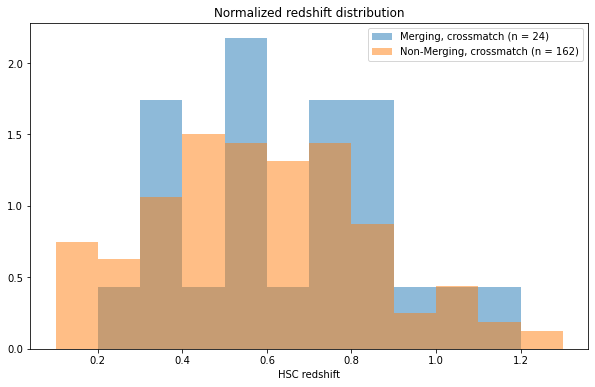

In [25]:
## redshift distribution

fig = plt.figure(figsize=(10, 6))

z_bins = np.arange(0.1, 1.4, 0.1)

### Merging vs. non-merging (cross-match)
plt.hist(HSC_cat[idx[in_crossmatch]][is_merging_cm][:,2], bins=z_bins, density=True, alpha=0.5, \
         label=f'Merging, crossmatch (n = {np.sum(is_merging_cm)})')
plt.hist(HSC_cat[idx[in_crossmatch]][~is_merging_cm][:,2], bins=z_bins, density=True, alpha=0.5, \
         label=f'Non-Merging, crossmatch (n = {np.sum(~is_merging_cm)})')

### Merging vs. non-merging (full HSC catalog)
# plt.hist(HSC_cat[is_merging_full][:,2], bins=z_bins, density=True, alpha=0.5, \
#          label=f'Merging (n = {np.sum(is_merging_full)})')
# plt.hist(HSC_cat[~is_merging_full][:,2], bins=z_bins, density=True, alpha=0.5, \
#          label=f'Non-Merging (n = {np.sum(~is_merging_full)})')

### Well-centered vs. miscentered (cross-matched sample)
# plt.hist(HSC_cat[idx[is_well_centered]][:,2], bins=z_bins, density=True, alpha=0.5, \
#          label=f'Well-centered (n = {np.sum(is_well_centered)})')
# plt.hist(HSC_cat[idx[is_miscentered]][:,2], bins=z_bins, density=True, alpha=0.5, \
#          label=f'Miscentered (n = {np.sum(is_miscentered)})')

### Cross-match vs. full HSC catalog
# plt.hist(HSC_cat[idx[in_crossmatch]][:,2], bins=z_bins, density=True, alpha=0.5, \
#          label=f'Cross-match (n = {np.sum(in_crossmatch)})')
# plt.hist(HSC_cat[:,2], bins=richness_bins, density=True, alpha=0.2, \
#          label=f'Full catalog (n = {len(HSC_cat)})')

plt.xlabel('HSC redshift')
plt.title('Normalized redshift distribution')

plt.legend()
plt.show()

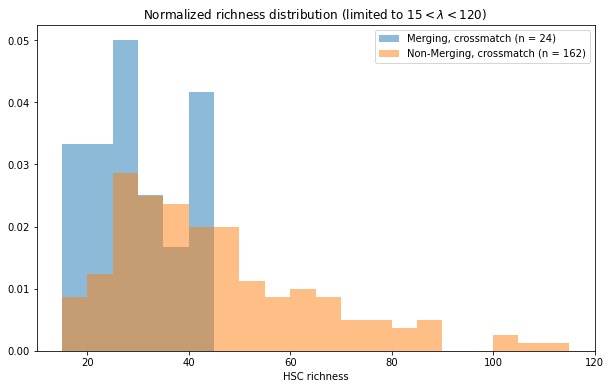

In [26]:
## richness distribution

fig = plt.figure(figsize=(10, 6))

lambda_min = 15
lambda_max = 120
richness_bins = np.arange(lambda_min, lambda_max, 5)

### Merging vs. non-merging (cross-match)
plt.hist(HSC_cat[idx[in_crossmatch]][is_merging_cm][:,3], bins=richness_bins, density=True, alpha=0.5, \
         label=f'Merging, crossmatch (n = {np.sum(is_merging_cm)})')
plt.hist(HSC_cat[idx[in_crossmatch]][~is_merging_cm][:,3], bins=richness_bins, density=True, alpha=0.5, \
         label=f'Non-Merging, crossmatch (n = {np.sum(~is_merging_cm)})')

### Merging vs. non-merging (full HSC catalog)
# plt.hist(HSC_cat[is_merging_full][:,3], bins=richness_bins, density=True, alpha=0.5, \
#          label=f'Merging (n = {np.sum(is_merging_full)})')
# plt.hist(HSC_cat[~is_merging_full][:,3], bins=richness_bins, density=True, alpha=0.5, \
#          label=f'Non-Merging (n = {np.sum(~is_merging_full)})')

### Well-centered vs. miscentered (cross-matched sample)
# plt.hist(HSC_cat[idx[is_well_centered]][:,3], bins=richness_bins, density=True, alpha=0.5, \
#          label=f'Well-centered (n = {np.sum(is_well_centered)})')
# plt.hist(HSC_cat[idx[is_miscentered]][:,3], bins=richness_bins, density=True, alpha=0.5, \
#          label=f'Miscentered (n = {np.sum(is_miscentered)})')

### Cross-match vs. full HSC catalog
# plt.hist(HSC_cat[idx[in_crossmatch]][:,3], bins=richness_bins, density=True, alpha=0.2, \
#          label=f'Cross-match (n = {np.sum(in_crossmatch)})')
# plt.hist(HSC_cat[:,3], bins=richness_bins, density=True, alpha=0.2, \
#          label=f'Full catalog (n = {len(HSC_cat)})')

plt.xlabel('HSC richness')
plt.title(f'Normalized richness distribution (limited to {lambda_min}$ < \lambda < ${lambda_max})')

plt.legend()
plt.show()